# FinTech Data Analytics & Machine Learning (Python)

This project demonstrates end-to-end data preparation, regression and machine learning modelling,
unsupervised learning with portfolio construction, and time-series forecasting using financial and
macroeconomic datasets.



## 1) Data preparation (WDI + IMF + COVID)

This section prepares a clean, analysis-ready dataset by loading, reshaping, and merging multiple
macroeconomic and financial data sources.
el.


### Step 1.1: Load WDI data
This step loads World Development Indicators data and performs initial inspection and cleaning.


In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive') #Connected Google Drive with Google Colab
path=('/content/drive/MyDrive/Group_Project/WDI_Data.xlsx')  # Accessing Google Drive folder
WDIs=pd.read_excel(path,'Data') #Imported WDI data from ‘Data’ sheet of the excel file
print("Loaded World Development Indicators Data.")
WDIs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded World Development Indicators Data.


,Country Name,Series Name,2019,2020,2021,2022,2023
0,Afghanistan,"Life expectancy at birth, total (years)",62.941000,61.454000,60.417000,65.617000,66.035000
1,Afghanistan,Gross savings (% of GDP),NaN,-2.737769,NaN,NaN,NaN
2,Afghanistan,Insurance and financial services (% of commerc...,0.795854,0.432507,NaN,NaN,NaN
3,Afghanistan,Population ages 65 and above (% of total popul...,2.376153,2.370734,2.352550,2.355142,2.377538
4,Afghanistan,Current health expenditure per capita (current...,74.064239,80.089233,81.521126,80.651604,NaN
...,...,...,...,...,...,...,...
1080,Zimbabwe,"Life expectancy at birth, total (years)",61.060000,61.530000,60.135000,62.360000,62.775000
1081,Zimbabwe,Gross savings (% of GDP),16.746879,15.097268,17.237567,12.547878,16.654035
1082,Zimbabwe,Insurance and financial services (% of commerc...,NaN,NaN,NaN,NaN,NaN
1083,Zimbabwe,Population ages 65 and above (% of total popul...,3.534241,3.581674,3.597974,3.608227,3.618322


### Step 1.2: Reshape WDI data by country and year
This step restructures WDI data into a panel format suitable for regression and machine learning analysis



In [ ]:

# Reshape from wide to long format
WDIs_long = pd.melt(WDIs, id_vars=["Country Name", "Series Name"], var_name="Year", value_name="Var")
print("Reshaped WDI data to long format by country, series, year. Each row now represents one indicator for one country-year.")
WDIs_long

# Pivot to wide format with each indicator in a column
WDIs_wide = WDIs_long.pivot(index=["Country Name", "Year"], columns="Series Name", values="Var")
print("Converted long format to wide format by country and year where indicators are separate columns.")
WDIs_wide

# Drop rows with missing values
import numpy as np
from numpy import nan as NA
WDIs_wide_clean = WDIs_wide.dropna()
print(f"Dropped rows with missing values.")
WDIs_wide_clean
df1=WDIs_wide_clean[['Current health expenditure per capita (current US$)','Gross savings (% of GDP)','Insurance and financial services (% of commercial service exports)','Life expectancy at birth, total (years)','Population ages 65 and above (% of total population)']].reset_index()
print(f"As variables/column names are not in a row in the dataset, resetted indexes and renamed columns into variables.")
df1

Reshaped WDI data to long format by country, series, year. Each row now represents one indicator for one country-year.
Converted long format to wide format by country and year where indicators are separate columns.
Dropped rows with missing values.
As variables/column names are not in a row in the dataset, resetted indexes and renamed columns into variables.


Series Name,Country Name,Year,Current health expenditure per capita (current US$),Gross savings (% of GDP),Insurance and financial services (% of commercial service exports),"Life expectancy at birth, total (years)",Population ages 65 and above (% of total population)
0,Afghanistan,2020,80.089233,-2.737769,0.432507,61.454,2.370734
1,Albania,2019,366.340149,17.453887,0.509183,79.467,14.248099
2,Albania,2020,396.174774,17.657214,0.790201,77.824,14.767004
3,Albania,2021,465.570435,21.140489,0.382506,76.844,15.266005
4,Albania,2022,414.350250,21.035003,0.787975,78.769,15.776338
...,...,...,...,...,...,...,...
583,West Bank and Gaza,2022,350.638123,14.561074,0.013087,76.662,3.702799
584,Zambia,2019,85.023499,39.786009,8.925108,62.914,1.787009
585,Zambia,2020,60.017799,46.415646,9.204696,63.361,1.808276
586,Zambia,2021,74.838028,45.138757,2.415110,62.363,1.826962


### Step 1.3: Load and reshape IMF (IFS) data
This step processes IMF International Financial Statistics data and aligns it with the WDI structure.



In [ ]:

# Load IMF dataset from Google Drive
path = '/content/drive/MyDrive/Group_Project/IMF_Data.csv' #Imported IMF data (csv) file
IMF = pd.read_csv(path)

# Reshape the data: Wide to Long format
IMF_long = pd.melt(IMF, id_vars=["COUNTRY", "INDICATOR"], var_name="Year", value_name="Var")
print("Reshaped IMF data to long format. Now each row represents a country-indicator-year combination.")
IMF_long

Reshaped IMF data to long format. Now each row represents a country-indicator-year combination.


,COUNTRY,INDICATOR,Year,Var
0,Albania,Insurance corporations,2019,12.0
1,Algeria,Insurance corporations,2019,24.0
2,"Andorra, Principality of",Insurance corporations,2019,NaN
3,Angola,Insurance corporations,2019,24.0
4,"Anguilla, United Kingdom-British Overseas Terr...",Insurance corporations,2019,26.0
...,...,...,...,...
770,Vanuatu,Insurance corporations,2023,NaN
771,Vietnam,Insurance corporations,2023,NaN
772,West Bank and Gaza,Insurance corporations,2023,NaN
773,Zambia,Insurance corporations,2023,NaN


In [ ]:
# Pivot back to wide format: Each indicator becomes a separate column
IMF_wide = IMF_long.pivot(index=["COUNTRY", "Year"], columns="INDICATOR", values="Var")
IMF_wide_dropna=IMF_wide.dropna()  #Rows with missing values will be dropped
print("Pivoted IMF data to wide format with each indicator in a separate column.")
IMF_wide_dropna

Pivoted IMF data to wide format with each indicator in a separate column.


INDICATOR      Insurance corporations
COUNTRY  Year                        
Albania  2019                    12.0
         2020                    12.0
         2021                    12.0
         2022                    12.0
         2023                    12.0
...                               ...
Zambia   2021                    31.0
         2022                    33.0
Zimbabwe 2019                    46.0
         2020                    46.0
         2021                    53.0

[704 rows x 1 columns]

In [ ]:
# Final clean dataset with dependent variable: 'Insurance corporations'
df2=IMF_wide_clean[['Insurance corporations']].reset_index()

print("Selected 'Insurance corporations' as dependent variable and reset index.")
df2

Selected 'Insurance corporations' as dependent variable and reset index.


INDICATOR,COUNTRY,Year,Insurance corporations
0,Albania,2019,12.0
1,Albania,2020,12.0
2,Albania,2021,12.0
3,Albania,2022,12.0
4,Albania,2023,12.0
...,...,...,...
699,Zambia,2021,31.0
700,Zambia,2022,33.0
701,Zimbabwe,2019,46.0
702,Zimbabwe,2020,46.0


### Step 1.4: Load and aggregate COVID-19 data
This step aggregates COVID-19 indicators to a country–year level for integration with macroeconomic data.



In [ ]:

# Load COVID-19 dataset from Microsoft Azure (Parquet format)
covid_url = "https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/bing_covid-19_data/latest/bing_covid-19_data.parquet"
covid_df = pd.read_parquet(covid_url)
print("Loaded COVID-19 dataset from Microsoft Azure.")
print("Sample of raw data:")
print(covid_df.head())

Loaded COVID-19 dataset from Microsoft Azure.
Sample of raw data:
       id     updated  confirmed  confirmed_change  deaths  deaths_change  \
0  338995  2020-01-21        262               NaN     0.0            NaN   
1  338996  2020-01-22        313              51.0     0.0            0.0   
2  338997  2020-01-23        578             265.0     0.0            0.0   
3  338998  2020-01-24        841             263.0     0.0            0.0   
4  338999  2020-01-25       1320             479.0     0.0            0.0   

   recovered  recovered_change  latitude  longitude  iso2  iso3  \
0        NaN               NaN       NaN        NaN  None  None   
1        NaN               NaN       NaN        NaN  None  None   
2        NaN               NaN       NaN        NaN  None  None   
3        NaN               NaN       NaN        NaN  None  None   
4        NaN               NaN       NaN        NaN  None  None   

  country_region admin_region_1 iso_subdivision admin_region_2  \
0 

In [ ]:
# Convert 'updated' column to datetime format
covid_df['updated'] = pd.to_datetime(covid_df['updated'])

# Extract year from 'updated' date
covid_df['year'] = covid_df['updated'].dt.year

# Group data by country and year, and sum the COVID metrics
covid_yearly = covid_df.groupby(['country_region', 'year'])[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Rename column for consistency with other datasets
covid_yearly.rename(columns={'country_region': 'country'}, inplace=True)

# Assign final collapsed dataset to df3
df3 = covid_yearly

# Display the result
print("\n✅ Final collapsed COVID dataset (df3):")
df3


✅ Final collapsed COVID dataset (df3):


,country,year,confirmed,deaths,recovered
0,Afghanistan,2020,8573552,296583.0,5979181.0
1,Afghanistan,2021,39174634,1759148.0,18657813.0
2,Afghanistan,2022,67753508,2809380.0,0.0
3,Afghanistan,2023,13138535,496297.0,0.0
4,Albania,2020,3783306,88354.0,1994594.0
...,...,...,...,...,...
925,Zambia,2023,21424525,254736.0,0.0
926,Zimbabwe,2020,1348382,36228.0,1024985.0
927,Zimbabwe,2021,30274502,1023046.0,14018302.0
928,Zimbabwe,2022,91531152,2009729.0,0.0


### Step 1.5: Merge WDI, IMF, and COVID datasets by country and year
This step combines all prepared datasets into a unified panel for downstream modelling.



In [ ]:

# Identify unique country names in each dataset
countries_df1 = set(df1['Country Name'].unique())
countries_df2 = set(df2['COUNTRY'].unique())
countries_df3 = set(df3['country'].unique())
# Find mismatches in country names
print("Countries in df1 but not df2:\n", countries_df1 - countries_df2)
print("Countries in df2 but not df1:\n", countries_df2 - countries_df1)
print("Countries in df1 but not df3:\n", countries_df1 - countries_df3)

Countries in df1 but not df2:
 {'Burkina Faso', 'Timor-Leste', 'Azerbaijan', 'Lesotho', 'Lithuania', 'Ecuador', 'United States', 'Estonia', 'Senegal', 'Morocco', 'Czechia', 'Kuwait', 'Armenia', 'Poland', 'San Marino', "Cote d'Ivoire", 'Sudan', 'Mozambique', 'Kazakhstan', 'Uzbekistan', 'Tanzania', 'Libya', 'Kiribati', 'Mali', 'Palau', 'Turkiye', 'North Macedonia', 'Benin', 'Uganda', 'China', 'Egypt, Arab Rep.', 'Canada', 'Cambodia', 'Serbia', 'Congo, Dem. Rep.', 'Netherlands', 'Sri Lanka', 'Korea, Rep.', 'Afghanistan', 'Togo', 'United Kingdom', 'Belarus', 'Philippines', 'Panama', 'Fiji', 'Tajikistan', 'Mauritania', 'Congo, Rep.', 'Sierra Leone', 'Croatia', 'Latvia', 'Niger', 'Ethiopia', 'Kyrgyz Republic', 'Bahrain', 'Madagascar', 'Moldova', 'Slovenia', 'Comoros'}
Countries in df2 but not df1:
 {'Marshall Islands, Republic of the', 'Liberia', 'Ethiopia, The Federal Democratic Republic of', 'Uzbekistan, Republic of', 'United Arab Emirates', 'Anguilla, United Kingdom-British Overseas Terri

In [ ]:
# Standardize country names in IMF dataset (df2)
country_rename_df2 = {
    'Netherlands, The': 'Netherlands',
    'Madagascar, Republic of': 'Madagascar',
    'Bahrain, Kingdom of': 'Bahrain',
    'Slovenia, Republic of': 'Slovenia',
    'Uzbekistan, Republic of': 'Uzbekistan',
    'Tajikistan, Republic of': 'Tajikistan',
    'Ethiopia, The Federal Democratic Republic of': 'Ethiopia',
    'Moldova, Republic of': 'Moldova',
    'Azerbaijan, Republic of': 'Azerbaijan',
    'Fiji, Republic of': 'Fiji',
    'Poland, Republic of': 'Poland',
    'Mozambique, Republic of': 'Mozambique',
    'Lithuania, Republic of': 'Lithuania',
    "China, People's Republic of": 'China',
    'Latvia, Republic of': 'Latvia',
    'Czech Republic': 'Czechia',
    'Serbia, Republic of': 'Serbia',
    'Estonia, Republic of': 'Estonia',
    'San Marino, Republic of': 'San Marino',
    'Kazakhstan, Republic of': 'Kazakhstan',
    'Korea, Republic of': 'Korea, Rep.',
    'Congo, Democratic Republic of the': 'Congo, Dem. Rep.',
    'Egypt, Arab Republic of': 'Egypt, Arab Rep.',
    'Congo, Republic of': 'Congo, Rep.',
    'Tanzania, United Republic of': 'Tanzania',
    'Türkiye, Republic of': 'Turkiye',
    'Lesotho, Kingdom of': 'Lesotho',
    'Croatia, Republic of': 'Croatia',
    'North Macedonia, Republic of': 'North Macedonia',
    'Timor-Leste, Democratic Republic of': 'Timor-Leste'
}
df2['COUNTRY'] = df2['COUNTRY'].replace(country_rename_df2)

# Standardize country names in COVID dataset (df3)
country_rename_df3 = {
    "Cote d'Ivoire": "Cote d'Ivoire",
    'Congo, Democratic Republic of the': 'Congo, Dem. Rep.',
    'Congo, Republic of the': 'Congo, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Korea, Republic of': 'Korea, Rep.',
    'Slovakia': 'Slovak Republic',
    'Turkey': 'Turkiye',
    'Egypt': 'Egypt, Arab Rep.',
    'Russia': 'Russian Federation',
    'Brunei': 'Brunei Darussalam',
    'Gambia': 'Gambia, The',
    'Palestine': 'West Bank and Gaza'
}
df3['country'] = df3['country'].replace(country_rename_df3)

In [ ]:
# Harmonize column names across all datasets
df1.rename(columns={'Country Name': 'Country'}, inplace=True)
df2.rename(columns={'COUNTRY': 'Country'}, inplace=True)
df3.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)

# Convert 'Year' columns to numeric type
df1['Year'] = pd.to_numeric(df1['Year'])
df2['Year'] = pd.to_numeric(df2['Year'])

# Merge all three datasets by Country and Year
merged_df = pd.merge(df1, df2, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, df3, on=['Country', 'Year'], how='inner')

# Check merge results
print("Final merged dataset shape:", merged_df.shape)
print("Sample of merged data:\n", merged_df.head())
print("Missing values check:\n", merged_df.isnull().sum())

# Store final result as df_final (optional for next steps)
df_final = merged_df

Final merged dataset shape: (328, 11)
Sample of merged data:
    Country  Year  Current health expenditure per capita (current US$)  \
0  Albania  2020                                         396.174774     
1  Albania  2021                                         465.570435     
2  Albania  2022                                         414.350250     
3  Algeria  2020                                         211.072769     
4  Algeria  2021                                         208.526825     

   Gross savings (% of GDP)  \
0                 17.657214   
1                 21.140489   
2                 21.035003   
3                 33.337087   
4                 38.288720   

   Insurance and financial services (% of commercial service exports)  \
0                                           0.790201                    
1                                           0.382506                    
2                                           0.787975                    
3                   

## 2) Predictive modelling (Regression + Machine Learning)

This section applies econometric and machine learning methods to model a financial outcome variable
and evaluate predictive performance.
cs.


### Step 2.1: Exploratory regression analysis and functional form assessment
This step explores bivariate relationships, assesses linearity, and evaluates the need for polynomial
or logarithmic transformations.


In [ ]:
# Rename columns for clarity
column_renames = {
    'Insurance corporations': 'insurance_corporations',
    'Life expectancy at birth, total (years)': 'life_expectancy',
    'Gross savings (% of GDP)': 'gross_savings',
    'Insurance and financial services (% of commercial service exports)': 'insurance_exports',
    'Population ages 65 and above (% of total population)': 'population_65_above',
    'Current health expenditure per capita (current US$)': 'health_expenditure'
}
# Rename columns in merged dataframe
merged_df = merged_df.rename(columns=column_renames)



=== LIFE_EXPECTANCY ===


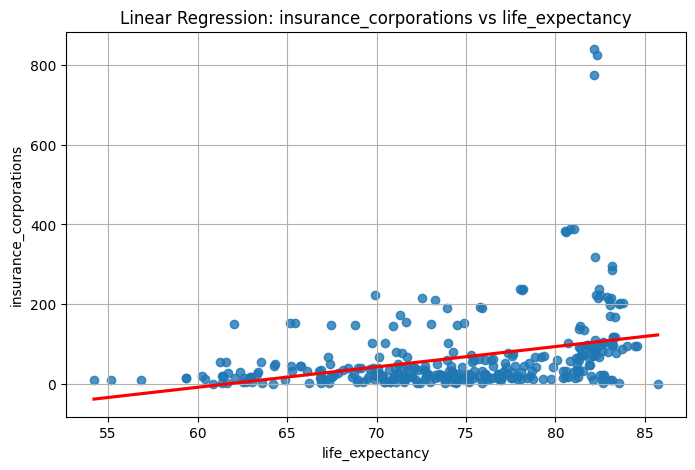

Linear regression summary for insurance_corporations ~ life_expectancy
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.112
Model:                                OLS   Adj. R-squared:                  0.109
Method:                     Least Squares   F-statistic:                     41.17
Date:                    Fri, 09 May 2025   Prob (F-statistic):           4.91e-10
Time:                            05:02:36   Log-Likelihood:                -1957.7
No. Observations:                     328   AIC:                             3919.
Df Residuals:                         326   BIC:                             3927.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------

<ipython-input-53-88810def8793>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[0] +
<ipython-input-53-88810def8793>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[1] * x_vals +
<ipython-input-53-88810def8793>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[2] * x_vals**2


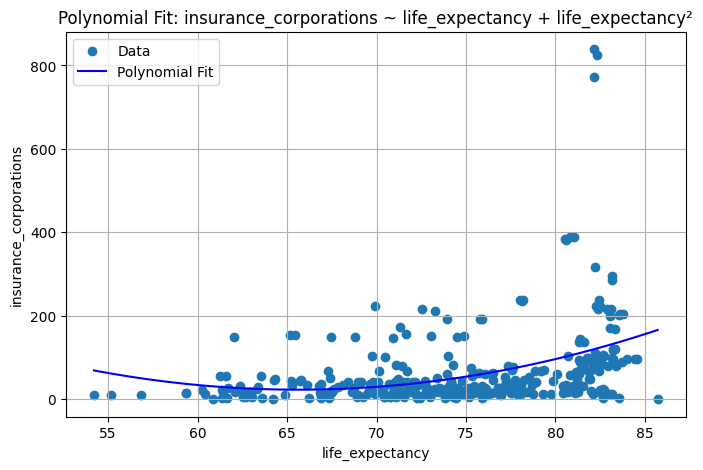

Polynomial regression summary for insurance_corporations ~ life_expectancy + life_expectancy²
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.144
Model:                                OLS   Adj. R-squared:                  0.138
Method:                     Least Squares   F-statistic:                     27.28
Date:                    Fri, 09 May 2025   Prob (F-statistic):           1.11e-11
Time:                            05:02:37   Log-Likelihood:                -1951.7
No. Observations:                     328   AIC:                             3909.
Df Residuals:                         325   BIC:                             3921.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.

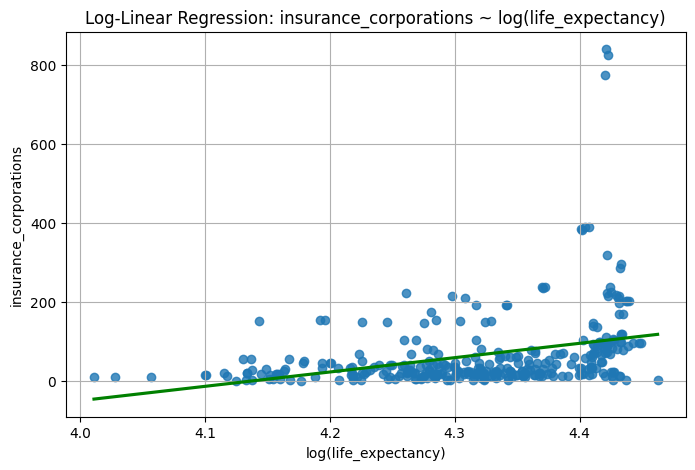

Log-linear regression summary for insurance_corporations ~ log(life_expectancy)
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.106
Model:                                OLS   Adj. R-squared:                  0.103
Method:                     Least Squares   F-statistic:                     38.53
Date:                    Fri, 09 May 2025   Prob (F-statistic):           1.64e-09
Time:                            05:02:37   Log-Likelihood:                -1958.9
No. Observations:                     328   AIC:                             3922.
Df Residuals:                         326   BIC:                             3929.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--

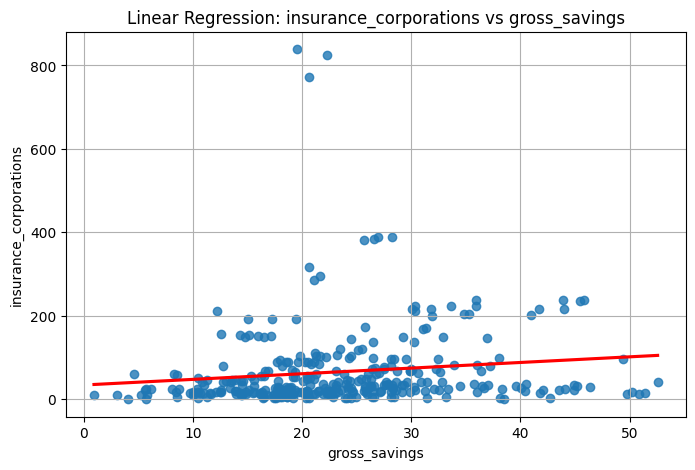

Linear regression summary for insurance_corporations ~ gross_savings
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.017
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     5.562
Date:                    Fri, 09 May 2025   Prob (F-statistic):             0.0189
Time:                            05:02:37   Log-Likelihood:                -1974.4
No. Observations:                     328   AIC:                             3953.
Df Residuals:                         326   BIC:                             3960.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------

<ipython-input-53-88810def8793>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[0] +
<ipython-input-53-88810def8793>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[1] * x_vals +
<ipython-input-53-88810def8793>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[2] * x_vals**2


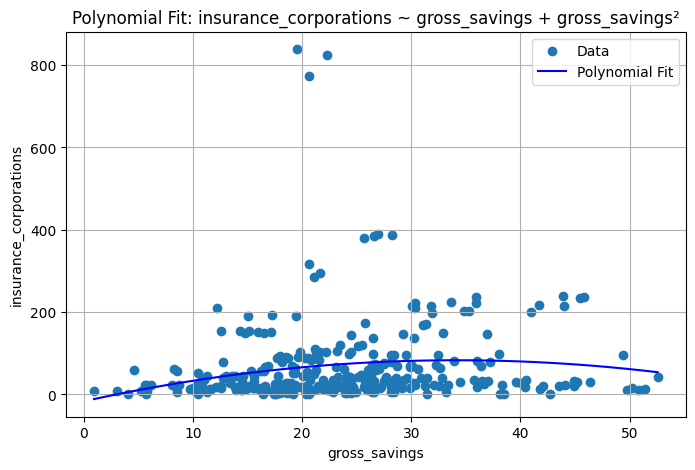

Polynomial regression summary for insurance_corporations ~ gross_savings + gross_savings²
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.029
Model:                                OLS   Adj. R-squared:                  0.023
Method:                     Least Squares   F-statistic:                     4.908
Date:                    Fri, 09 May 2025   Prob (F-statistic):            0.00795
Time:                            05:02:37   Log-Likelihood:                -1972.3
No. Observations:                     328   AIC:                             3951.
Df Residuals:                         325   BIC:                             3962.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025   

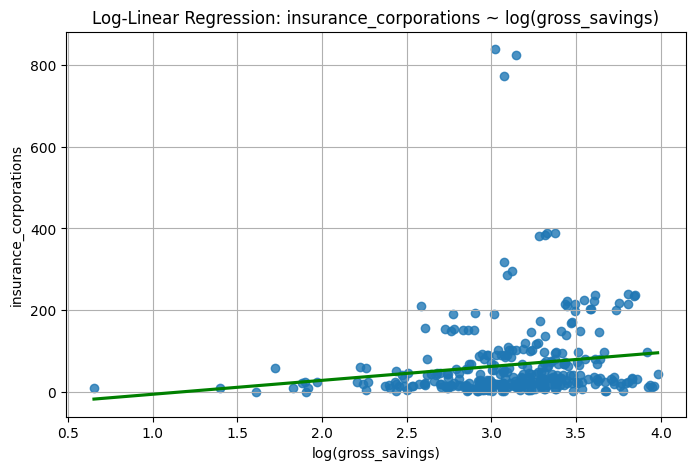

Log-linear regression summary for insurance_corporations ~ log(gross_savings)
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.023
Model:                                OLS   Adj. R-squared:                  0.020
Method:                     Least Squares   F-statistic:                     7.717
Date:                    Fri, 09 May 2025   Prob (F-statistic):            0.00579
Time:                            05:02:37   Log-Likelihood:                -1973.3
No. Observations:                     328   AIC:                             3951.
Df Residuals:                         326   BIC:                             3958.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------

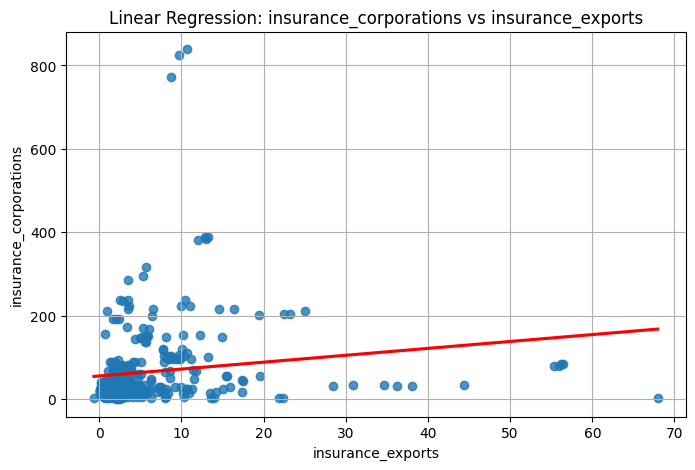

Linear regression summary for insurance_corporations ~ insurance_exports
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.022
Model:                                OLS   Adj. R-squared:                  0.019
Method:                     Least Squares   F-statistic:                     7.421
Date:                    Fri, 09 May 2025   Prob (F-statistic):            0.00680
Time:                            05:02:38   Log-Likelihood:                -1973.5
No. Observations:                     328   AIC:                             3951.
Df Residuals:                         326   BIC:                             3959.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------

<ipython-input-53-88810def8793>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[0] +
<ipython-input-53-88810def8793>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[1] * x_vals +
<ipython-input-53-88810def8793>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[2] * x_vals**2


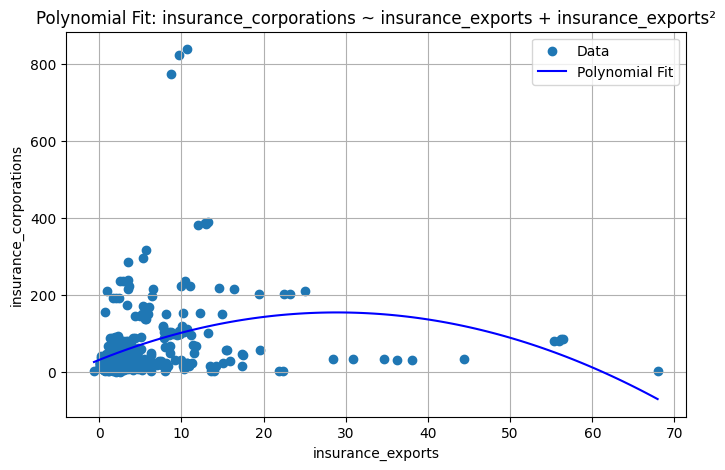

Polynomial regression summary for insurance_corporations ~ insurance_exports + insurance_exports²
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.098
Model:                                OLS   Adj. R-squared:                  0.092
Method:                     Least Squares   F-statistic:                     17.60
Date:                    Fri, 09 May 2025   Prob (F-statistic):           5.53e-08
Time:                            05:02:38   Log-Likelihood:                -1960.3
No. Observations:                     328   AIC:                             3927.
Df Residuals:                         325   BIC:                             3938.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|   

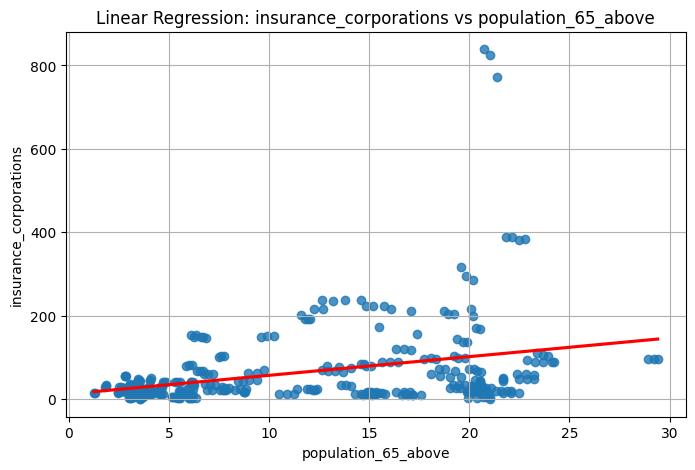

Linear regression summary for insurance_corporations ~ population_65_above
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.103
Model:                                OLS   Adj. R-squared:                  0.101
Method:                     Least Squares   F-statistic:                     37.62
Date:                    Fri, 09 May 2025   Prob (F-statistic):           2.49e-09
Time:                            05:02:38   Log-Likelihood:                -1959.3
No. Observations:                     328   AIC:                             3923.
Df Residuals:                         326   BIC:                             3930.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------

<ipython-input-53-88810def8793>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[0] +
<ipython-input-53-88810def8793>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[1] * x_vals +
<ipython-input-53-88810def8793>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[2] * x_vals**2


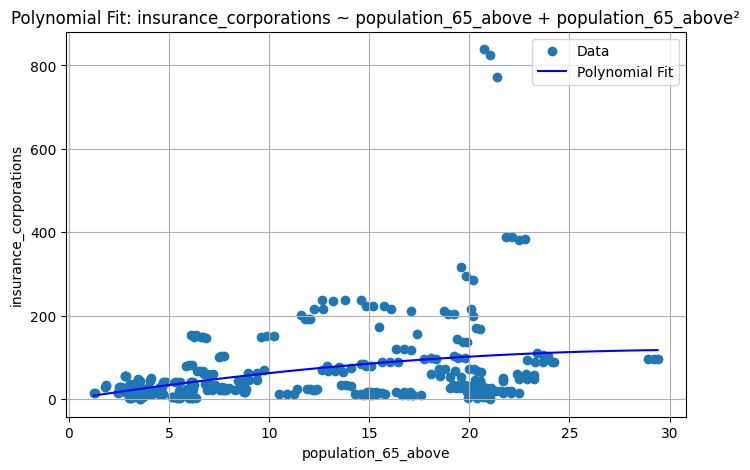

Polynomial regression summary for insurance_corporations ~ population_65_above + population_65_above²
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.106
Model:                                OLS   Adj. R-squared:                  0.100
Method:                     Least Squares   F-statistic:                     19.19
Date:                    Fri, 09 May 2025   Prob (F-statistic):           1.32e-08
Time:                            05:02:38   Log-Likelihood:                -1958.9
No. Observations:                     328   AIC:                             3924.
Df Residuals:                         325   BIC:                             3935.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>

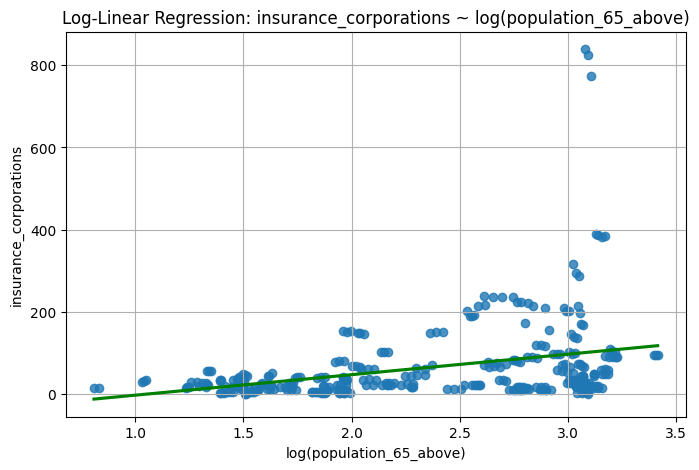

Log-linear regression summary for insurance_corporations ~ log(population_65_above)
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.104
Model:                                OLS   Adj. R-squared:                  0.101
Method:                     Least Squares   F-statistic:                     37.75
Date:                    Fri, 09 May 2025   Prob (F-statistic):           2.34e-09
Time:                            05:02:38   Log-Likelihood:                -1959.2
No. Observations:                     328   AIC:                             3922.
Df Residuals:                         326   BIC:                             3930.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0

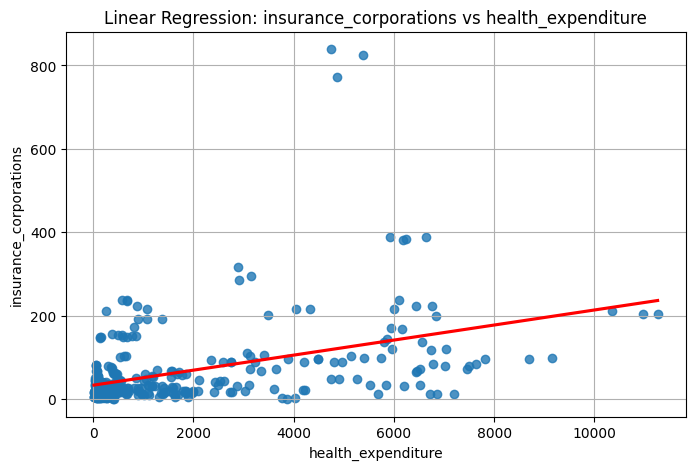

Linear regression summary for insurance_corporations ~ health_expenditure
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.174
Model:                                OLS   Adj. R-squared:                  0.171
Method:                     Least Squares   F-statistic:                     68.64
Date:                    Fri, 09 May 2025   Prob (F-statistic):           3.10e-15
Time:                            05:02:38   Log-Likelihood:                -1945.8
No. Observations:                     328   AIC:                             3896.
Df Residuals:                         326   BIC:                             3903.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------

<ipython-input-53-88810def8793>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[0] +
<ipython-input-53-88810def8793>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[1] * x_vals +
<ipython-input-53-88810def8793>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poly_model.params[2] * x_vals**2


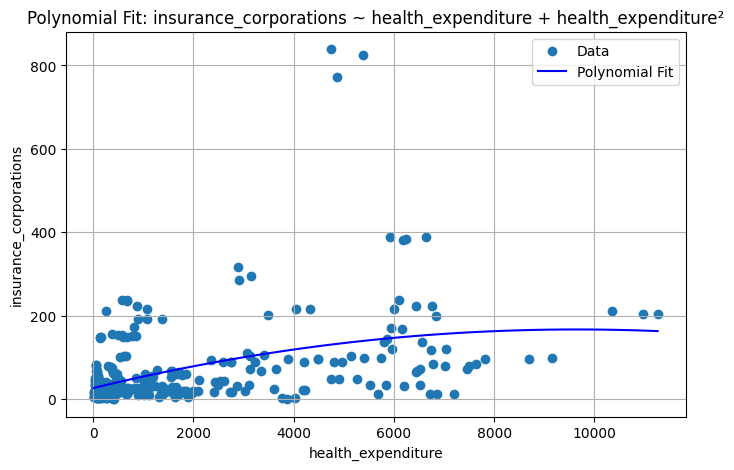

Polynomial regression summary for insurance_corporations ~ health_expenditure + health_expenditure²
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.182
Model:                                OLS   Adj. R-squared:                  0.177
Method:                     Least Squares   F-statistic:                     36.26
Date:                    Fri, 09 May 2025   Prob (F-statistic):           6.11e-15
Time:                            05:02:38   Log-Likelihood:                -1944.1
No. Observations:                     328   AIC:                             3894.
Df Residuals:                         325   BIC:                             3906.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|

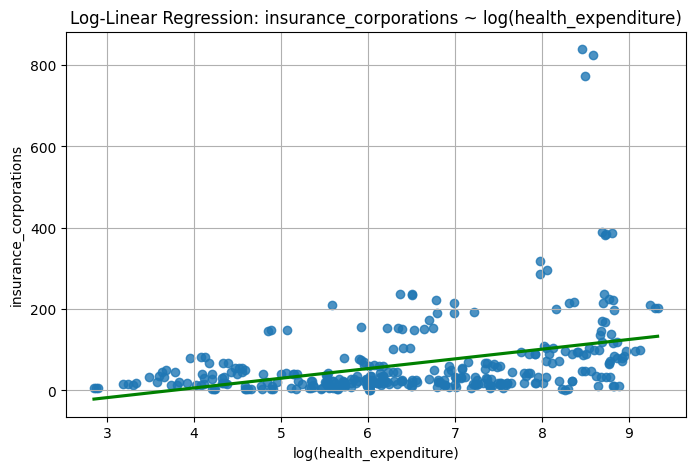

Log-linear regression summary for insurance_corporations ~ log(health_expenditure)
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.138
Model:                                OLS   Adj. R-squared:                  0.136
Method:                     Least Squares   F-statistic:                     52.32
Date:                    Fri, 09 May 2025   Prob (F-statistic):           3.39e-12
Time:                            05:02:39   Log-Likelihood:                -1952.8
No. Observations:                     328   AIC:                             3910.
Df Residuals:                         326   BIC:                             3917.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.9

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Define dependent and independent variables

dependent_var = 'insurance_corporations'
independent_vars = [
    'life_expectancy',
    'gross_savings',
    'insurance_exports',
    'population_65_above',
    'health_expenditure'
]

# Loop through each independent variable

for var in independent_vars:
    print(f"\n\n=== {var.upper()} ===")

    # 1. SCATTER PLOT WITH LINEAR REGRESSION LINE
    plt.figure(figsize=(8, 5))
    sns.regplot(x=merged_df[var], y=merged_df[dependent_var], ci=None, line_kws={'color': 'red'})
    plt.title(f'Linear Regression: {dependent_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.show()

    # 2. LINEAR REGRESSION MODEL
    linear_model = smf.ols(f"{dependent_var} ~ {var}", data=merged_df).fit()
    print(f"Linear regression summary for {dependent_var} ~ {var}")
    print(linear_model.summary())
    print(f"R-squared (linear): {linear_model.rsquared:.3f}")

    # 3. POLYNOMIAL REGRESSION MODEL (DEGREE 2)
    merged_df[f'{var}_squared'] = merged_df[var] ** 2
    poly_model = smf.ols(f"{dependent_var} ~ {var} + {var}_squared", data=merged_df).fit()

  # Plot polynomial fit
    x_vals = np.linspace(merged_df[var].min(), merged_df[var].max(), 100)
    y_vals = (
        poly_model.params[0] +
        poly_model.params[1] * x_vals +
        poly_model.params[2] * x_vals**2
    )

    plt.figure(figsize=(8, 5))
    plt.scatter(merged_df[var], merged_df[dependent_var], label='Data')
    plt.plot(x_vals, y_vals, color='blue', label='Polynomial Fit')
    plt.title(f'Polynomial Fit: {dependent_var} ~ {var} + {var}²')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Polynomial regression summary for {dependent_var} ~ {var} + {var}²")
    print(poly_model.summary())
    print(f"R-squared (polynomial): {poly_model.rsquared:.3f}")

  # Interpret which model fits better
    if poly_model.rsquared > linear_model.rsquared + 0.01:
        print("Polynomial model provides better fit than linear.")
    else:
        print("Linear model is sufficient; polynomial does not improve fit significantly.")

  # 4.  LOGARITHMIC TRANSFORMATION (ONLY IF VALUES > 0)
    if (merged_df[var] > 0).all():
        merged_df[f'log_{var}'] = np.log1p(merged_df[var])
        log_model = smf.ols(f"{dependent_var} ~ log_{var}", data=merged_df).fit()

        plt.figure(figsize=(8, 5))
        sns.regplot(x=merged_df[f'log_{var}'], y=merged_df[dependent_var], ci=None, line_kws={'color': 'green'})
        plt.title(f'Log-Linear Regression: {dependent_var} ~ log({var})')
        plt.xlabel(f'log({var})')
        plt.ylabel(dependent_var)
        plt.grid(True)
        plt.show()

        print(f"Log-linear regression summary for {dependent_var} ~ log({var})")
        print(log_model.summary())
        print(f"R-squared (log): {log_model.rsquared:.3f}")

        # Compare log to linear
        if log_model.rsquared > linear_model.rsquared + 0.01:
            print("Log transformation improves model fit over linear.")
        else:
            print("Log transformation does not significantly improve model fit.")
    else:
        print(f"Skipping log transformation for {var} due to non-positive values.")

**Life Expectancy**
A higher life expectancy is positively associated with the size of insurance corporations. The linear model shows a modest fit (R² = 0.112), but the polynomial model improves this to 0.144, suggesting a non-linear effect. This may indicate that insurance demand increases more rapidly after reaching a certain life expectancy level. The log transformation did not improve the model.

Life expectancy has a positive but non-linear effect on insurance development.

**Gross Savings (% of GDP)**
Gross savings has a weak positive impact on insurance corporations. The linear model explains very little variation (R² = 0.017), and although the polynomial and log models offer slight improvements, the effect remains weak overall. This suggests that while national savings contribute to financial development, they do not independently explain much about insurance sector growth.

Gross savings shows a minor, possibly non-linear influence.

**Insurance and Financial Services Exports**
The linear model reveals a weak relationship (R² = 0.022), but the polynomial model shows a much better fit (R² = 0.098), indicating a non-linear relationship. The inverted-U pattern suggests that exports promote insurance growth up to a point, after which the effect tapers off or declines. Log transformation was not applicable.

Insurance exports affect insurance activity in a non-linear, inverted-U manner.

**Population Aged 65 and Above**
A larger elderly population is consistently and positively associated with insurance sector size. The linear model performs well (R² = 0.103), and neither polynomial nor log models offer meaningful improvements. This implies a straightforward relationship — as the population ages, the demand for insurance products rises.

Population aging is a strong, linear driver of insurance sector expansion.

**Health Expenditure per Capita**
Health spending has the strongest relationship with insurance corporations. The linear model has the highest R² (0.174), and while the polynomial model gives a small gain, the squared term is not significant. The log model performs worse. This suggests that countries investing more in healthcare tend to have stronger insurance sectors.

Health expenditure is the most consistent and powerful predictor.

### Step 2.2: Multivariate regression modelling and interpretation
This step estimates multivariate regression models and interprets coefficients, statistical significance,
and overall model fit.


In [ ]:
pip install stargazer

In [ ]:

# Import necessary libraries
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer

# Define dependent and independent variables
dependent_var = 'insurance_corporations'
independent_vars = [
    'life_expectancy',
    'gross_savings',
    'insurance_exports',
    'population_65_above',
    'health_expenditure'
]

# Run bivariate regressions for each independent variable
models = []  # List to store models
for var in independent_vars:
    model = ols(f"{dependent_var} ~ {var}", data=merged_df).fit()
    models.append(model)
    print(f"\nBivariate model created: {dependent_var} ~ {var}")
    print(f"R-squared: {model.rsquared:.3f}, P-value for {var}: {model.pvalues[1]:.3f}")

# Run multivariate regression with all independent variables
multi_formula = f"{dependent_var} ~ " + " + ".join(independent_vars)
multi_model = ols(multi_formula, data=merged_df).fit()
models.append(multi_model)
print("\nMultivariate model created with all independent variables.")
print(f"R-squared (multivariate): {multi_model.rsquared:.3f}")

# Generate Stargazer-style LaTeX table
stargazer = Stargazer(models)
print("\nLaTeX-formatted regression table (for report formatting):")
print(stargazer.render_latex())

# Generate readable summary table using summary_col
print("\nReadable regression results table:")
table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=[f"Model {i+1}" for i in range(len(models))],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.3f}",
        'No. observations': lambda x: f"{int(x.nobs)}"
    }
)
print(table)



Bivariate model created: insurance_corporations ~ life_expectancy
R-squared: 0.112, P-value for life_expectancy: 0.000

Bivariate model created: insurance_corporations ~ gross_savings
R-squared: 0.017, P-value for gross_savings: 0.019

Bivariate model created: insurance_corporations ~ insurance_exports
R-squared: 0.022, P-value for insurance_exports: 0.007

Bivariate model created: insurance_corporations ~ population_65_above
R-squared: 0.103, P-value for population_65_above: 0.000

Bivariate model created: insurance_corporations ~ health_expenditure
R-squared: 0.174, P-value for health_expenditure: 0.000

Multivariate model created with all independent variables.
R-squared (multivariate): 0.187

LaTeX-formatted regression table (for report formatting):
\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{6}{c}{\textit{Dependent variable: insurance_corporations}} \
\cr \cline{2-7}
\\[-1.8ex] & (1) & (2) & (3) & 

<ipython-input-55-05d45a845260>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"R-squared: {model.rsquared:.3f}, P-value for {var}: {model.pvalues[1]:.3f}")
<ipython-input-55-05d45a845260>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"R-squared: {model.rsquared:.3f}, P-value for {var}: {model.pvalues[1]:.3f}")
<ipython-input-55-05d45a845260>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"R-squared: {

**Life Expectancy**
In the bivariate model (Model 1), life expectancy shows a strong positive effect on the size of insurance corporations. A one-year increase in life expectancy is associated with an increase of approximately 5.10 units in insurance corporations, and the result is highly significant (p < 0.001).
However, in the multivariate model (Model 6), this variable becomes statistically insignificant and the coefficient even turns slightly negative. This suggests that its influence may be captured indirectly through other variables, such as the aging population or health expenditure.

**Gross Savings (% of GDP)**
Gross savings is positively associated with insurance corporations in the bivariate model (Model 2), with a significant effect (β = 1.35, p < 0.05). This implies that countries with higher national savings tend to have stronger insurance sectors.
Yet, in the multivariate regression (Model 6), the significance disappears and the effect size drops. This indicates that gross savings alone does not explain much when other variables are considered.

**Insurance and Financial Services Exports**
Model 3 shows a significant positive effect of insurance exports (β = 1.65, p < 0.01) on insurance corporations. This suggests that countries exporting more insurance-related services tend to have more developed insurance sectors.
In the multivariate model, however, this variable loses its significance. The drop suggests that its effect overlaps with other macroeconomic indicators like health spending and savings.

**Population Aged 65 and Above**
This variable maintains a positive and significant relationship in both bivariate (Model 4, β = 4.48, p < 0.001) and multivariate regressions (Model 6, β = 2.13, p < 0.1).
Even though the effect size is reduced, it remains statistically important, indicating that an aging population is a consistent driver of insurance sector growth, possibly due to increased demand for life, health, and retirement insurance.

**Health Expenditure Per Capita**
Health expenditure shows the strongest and most consistent relationship with the dependent variable. In the bivariate regression (Model 5), a $1 increase in health expenditure per capita leads to an increase of 0.018 units in insurance corporations (p < 0.001).
Even in the multivariate model (Model 6), this relationship remains highly significant (p < 0.001), with a coefficient of 0.013. This highlights that health spending is a robust and independent predictor of insurance sector size.



### Step 2.3: Train–test split and baseline predictive performance
This step evaluates out-of-sample predictive accuracy using a train–test split and error metrics
such as MSE and RMSE.


Train size: 229 | Test size: 99

✅ OLS Regression Summary (Training Data):
                              OLS Regression Results                              
Dep. Variable:     insurance_corporations   R-squared:                       0.185
Model:                                OLS   Adj. R-squared:                  0.167
Method:                     Least Squares   F-statistic:                     10.12
Date:                    Fri, 09 May 2025   Prob (F-statistic):           9.42e-09
Time:                            05:49:41   Log-Likelihood:                -1374.0
No. Observations:                     229   AIC:                             2760.
Df Residuals:                         223   BIC:                             2781.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------

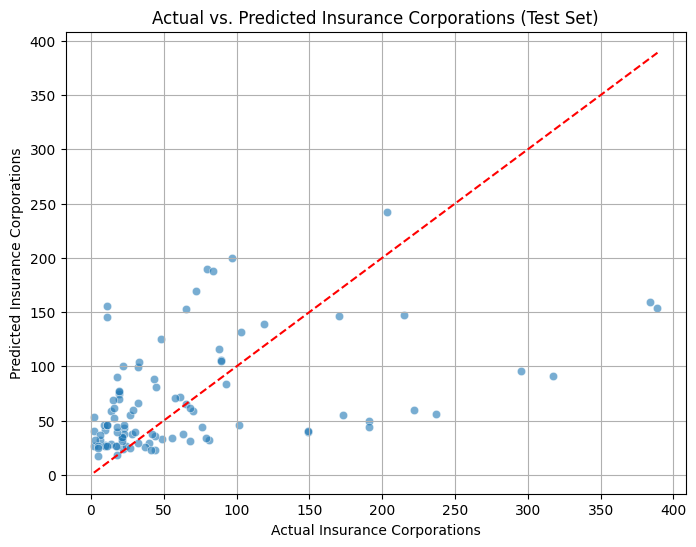

In [ ]:

from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Prepare dataset by selecting relevant variables and dropping missing values
analysis_df = merged_df[['insurance_corporations', 'life_expectancy', 'gross_savings',
                         'insurance_exports', 'population_65_above', 'health_expenditure']].dropna()

# Define features (X) and target (y)
X = analysis_df[['life_expectancy', 'gross_savings', 'insurance_exports',
                 'population_65_above', 'health_expenditure']]
y = analysis_df['insurance_corporations']

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train size: {len(X_train)} | Test size: {len(X_test)}")

# Add constant to training features
X_train_const = sm.add_constant(X_train)

# Fit OLS model on training data
final_model = sm.OLS(y_train, X_train_const).fit()
print("\n✅ OLS Regression Summary (Training Data):")
print(final_model.summary())

# Add constant to test features
X_test_const = sm.add_constant(X_test)

# Predict on test data
y_pred = final_model.predict(X_test_const)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\n✅ Test Set Evaluation:")
print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Insurance Corporations')
plt.ylabel('Predicted Insurance Corporations')
plt.title('Actual vs. Predicted Insurance Corporations (Test Set)')
plt.grid(True)
plt.show()

**Model Fit (Training Set):**
The model achieved an R-squared of 0.185 on the training data, meaning the five independent variables together explained approximately 18.5% of the variation in insurance corporations.
Among the predictors, only health expenditure was statistically significant (p < 0.001), confirming its consistent role as a strong determinant. Other variables — life expectancy, savings, exports, and elderly population — were not statistically significant when included jointly.

**Prediction Performance (Test Set):**
On the test data, the model produced a Mean Squared Error (MSE) of 5229.89 and a Root Mean Squared Error (RMSE) of 72.32. These values indicate moderate prediction accuracy. While the model performs reasonably well, there is room for improvement, particularly in capturing variation caused by high or low outlier values.

**Model Stability:**
The Durbin-Watson value of 2.21 indicates no major autocorrelation issues in residuals. However, the high condition number (5.35e+04) suggests potential multicollinearity, especially between life expectancy and elderly population.

### Step 2.4: Machine learning models and performance comparison (sklearn)
This step applies Ridge, LASSO, tree-based models, random forests, and neural networks and compares
their predictive performance against linear regression.


In [ ]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Standardize features (critical for regularized models and NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "OLS": final_model,  # From previous OLS
    "Ridge (α=0.5)": Ridge(alpha=0.5),
    "LASSO (α=0.1)": Lasso(alpha=0.1),
    "Regression Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    if name != "OLS":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = final_model.predict(X_test_const)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse})

# Convert to DataFrame
results_df = pd.DataFrame(results)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results_df

,Model,MSE,RMSE
0,OLS,5229.885439,72.317947
1,Ridge (α=0.5),5226.915255,72.297408
2,LASSO (α=0.1),5229.399848,72.314589
3,Regression Tree,2908.103897,53.926838
4,Random Forest,4147.714335,64.402751
5,Neural Network,4827.950171,69.483452


* The Regression Tree model performed the best with the lowest RMSE (53.93), significantly better than traditional OLS and regularized models.
* Random Forest also outperformed linear models with RMSE = 64.40, showing benefit from ensemble learning.
* OLS, Ridge, and LASSO produced very similar results (RMSE ~72.3), indicating that regularization had minimal effect on your dataset.
* The Neural Network model performed slightly better than OLS but not as well as tree-based models, possibly due to small dataset size or lack of non-linear complexity.

### Step 2.5: Scalable machine learning using PySpark
This step replicates the machine learning analysis using PySpark to demonstrate scalability for
large dataset.


In [ ]:


from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd

# Start Spark session
spark = SparkSession.builder.appName("Insurance_Modeling").getOrCreate()

# Drop NA and convert pandas DataFrame to Spark DataFrame
df_spark = spark.createDataFrame(merged_df.dropna())

# Define your independent variables
feature_cols = [
    'life_expectancy',
    'gross_savings',
    'insurance_exports',
    'population_65_above',
    'health_expenditure'
]

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_spark = assembler.transform(df_spark).select("features", "insurance_corporations")

# Split the data into training and test sets
train_data, test_data = df_spark.randomSplit([0.8, 0.2], seed=42)

# Define evaluator for RMSE and MSE
evaluator = RegressionEvaluator(labelCol="insurance_corporations", predictionCol="prediction")

# Initialize models
models = {
    "OLS": LinearRegression(featuresCol="features", labelCol="insurance_corporations"),
    "Ridge": LinearRegression(featuresCol="features", labelCol="insurance_corporations", elasticNetParam=0.0, regParam=0.5),
    "LASSO": LinearRegression(featuresCol="features", labelCol="insurance_corporations", elasticNetParam=1.0, regParam=0.01),
    "Decision Tree": DecisionTreeRegressor(featuresCol="features", labelCol="insurance_corporations"),
    "Random Forest": RandomForestRegressor(featuresCol="features", labelCol="insurance_corporations", numTrees=100),
    "GBT (Neural Net Approx)": GBTRegressor(featuresCol="features", labelCol="insurance_corporations", maxIter=100)
}

# Train and evaluate models
results = []

for name, model in models.items():
    # Train model
    fitted_model = model.fit(train_data)

    # Make predictions
    predictions = fitted_model.transform(test_data)

    # Evaluate predictions
    mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

    results.append({"Model": name, "MSE": round(mse, 2), "RMSE": round(rmse, 2)})

# Convert to pandas DataFrame and print sorted results
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n✅ PySpark Model Evaluation Results:")
print(results_df.to_string(index=False))

# Stop Spark session
spark.stop()


✅ PySpark Model Evaluation Results:
                  Model     MSE  RMSE
GBT (Neural Net Approx)  663.14 25.75
          Decision Tree 1406.38 37.50
          Random Forest 1634.23 40.43
                    OLS 2724.70 52.20
                  LASSO 2725.08 52.20
                  Ridge 2728.19 52.23


*   The Gradient Boosted Tree (GBT) model gave the lowest RMSE (25.75), making it the best performer among all models tested.
*   Tree-based models (GBT, Decision Tree, and Random Forest) all outperformed traditional linear models (OLS, Ridge, LASSO).
*   OLS, Ridge, and LASSO had similar RMSE values (~52.2), showing little benefit from regularization in this dataset.
*   The significant improvement from GBT shows that non-linear patterns exist in the data, which ensemble tree methods can capture more effectively.

## 3) Unsupervised learning + portfolio optimisation

This section applies clustering techniques and portfolio theory to analyse asset return behaviour
and construct diversified investment portfolios.


### Step 3.1: Stock return estimation and K-means clustering
This step loads monthly stock prices from Yahoo Finance, computes returns, and applies K-means
clustering, with the optimal number of clusters selected using the elbow method.


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 157.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


[*****                 10%                       ]  2 of 20 completed

yfinance version: 0.2.59


[*********************100%***********************]  20 of 20 completed
<ipython-input-66-9fb5a4b6f41a>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').ffill()



Monthly Returns (first 5 rows):
Ticker          AAPL      AMZN       BAC        BP       CVX        GM  \
Date                                                                     
2020-02-29 -0.114701 -0.062214 -0.131892 -0.119029 -0.118621 -0.086553   
2020-03-31 -0.069762  0.035021 -0.250335 -0.220518 -0.223698 -0.310377   
2020-04-30  0.155374  0.268900  0.132831 -0.024190  0.269666  0.072666   
2020-05-31  0.085094 -0.012785  0.002911 -0.001588  0.011372  0.161059   
2020-06-30  0.147386  0.129567 -0.008473  0.007779 -0.026936 -0.022411   

Ticker            GS       JNJ       JPM        KO       MCD       MRK  \
Date                                                                     
2020-02-29 -0.150378 -0.090901 -0.122771 -0.084075 -0.086858 -0.103933   
2020-03-31 -0.230014 -0.024911 -0.224615 -0.165487 -0.148426  0.013266   
2020-04-30  0.186493  0.144208  0.074698  0.037062  0.134321  0.031193   
2020-05-31  0.077954 -0.001725  0.016186  0.017215  0.000012  0.017393   
2020

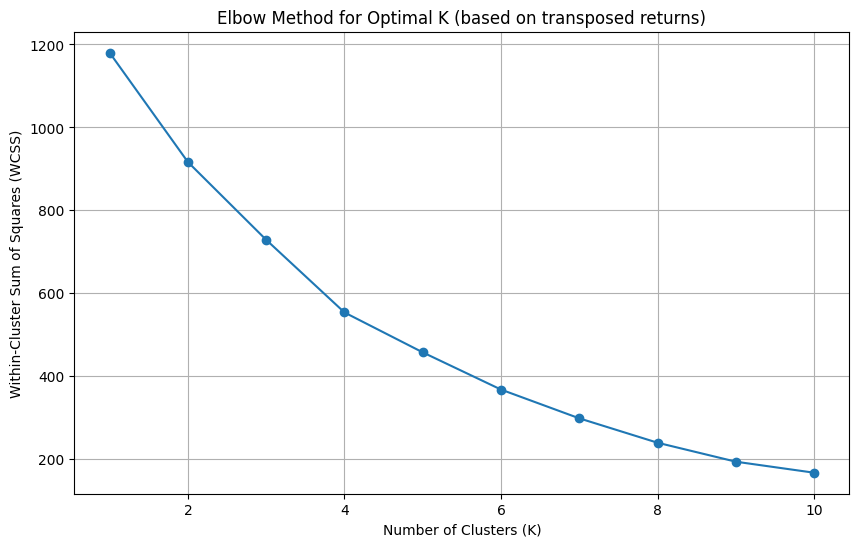


Stock Clusters:
   Ticker  Cluster
0    AAPL        0
1    AMZN        0
2     BAC        2
3      BP        4
4     CVX        4
5      GM        2
6      GS        2
7     JNJ        0
8     JPM        2
9      KO        0
10    MCD        0
11    MRK        0
12   MSFT        0
13   NVDA        1
14    PFE        0
15     PG        0
16    TGT        0
17   TSLA        3
18    WMT        0
19    XOM        4

Stocks in Cluster 1:
['AAPL', 'AMZN', 'JNJ', 'KO', 'MCD', 'MRK', 'MSFT', 'PFE', 'PG', 'TGT', 'WMT']

Stocks in Cluster 2:
['NVDA']

Stocks in Cluster 3:
['BAC', 'GM', 'GS', 'JPM']

Stocks in Cluster 4:
['TSLA']

Stocks in Cluster 5:
['BP', 'CVX', 'XOM']


In [ ]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check yfinance version
print("yfinance version:", yf.__version__)

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'NVDA', 'XOM', 'CVX', 'BP', 'JNJ', 'PFE', 'MRK', 'JPM',
           'GS', 'BAC', 'KO', 'MCD', 'PG', 'AMZN', 'WMT', 'TGT', 'TSLA', 'GM']
start_date = '2020-01-01'
end_date = '2024-12-31'

# Use yfinance directly
data = yf.download(tickers, start=start_date, end=end_date)
# Access the 'Close' column instead of 'Adj Close'
data = data['Close']

# Forward fill to handle missing values and compute monthly returns
monthly_prices = data.resample('M').ffill()
monthly_returns = monthly_prices.pct_change().dropna()

# Print some monthly returns
print("\nMonthly Returns (first 5 rows):")
print(monthly_returns.head())
# Transpose the monthly returns DataFrame
monthly_returns_transposed = monthly_returns.T

print("\nTransposed Monthly returns (first 5 rows - now stocks):")
print(monthly_returns_transposed.head())

# Apply K-Means Clustering on the transposed data
X = monthly_returns_transposed.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose Optimal Number of Clusters
wcss = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K (based on transposed returns)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Determine the optimal K based on the elbow point (visually)
optimal_k = 5

# 6. Apply K-Means with the optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_scaled)

# 7. Create a DataFrame to store the cluster labels for each stock
stock_clusters = pd.DataFrame({'Ticker': monthly_returns_transposed.index, 'Cluster': clusters})

print("\nStock Clusters:")
print(stock_clusters)

# 8. Print the stocks in each cluster
for i in range(optimal_k):
    cluster_stocks = stock_clusters[stock_clusters['Cluster'] == i]['Ticker'].tolist()
    print(f"\nStocks in Cluster {i + 1}:")
    print(cluster_stocks)

As shown in the elbow diagram, the sharp bend occurs at K = 5, indicating that 5 clusters balance accuracy and simplicity.

Interpretation of the 5 Clusters:
Cluster 1: 11 stable large-cap and defensive stocks like AAPL, AMZN, MSFT, PG, JNJ
→ Similar return behavior, possibly due to consistent growth and consumer demand.

Cluster 2: NVDA only
→ Extremely high volatility and unique return pattern driven by the AI chip boom.

Cluster 3: BAC, GM, GS, JPM
→ Cyclical financials and industrials reacting strongly to macroeconomic conditions.

Cluster 4: TSLA only
→ Isolated due to high-risk, high-growth movements not shared with others.

Cluster 5: BP, CVX, XOM
→ Classic energy stocks clustered together based on oil price dependency

### Step 3.2: Cluster-level portfolio risk and return analysis
This step estimates portfolio-level returns and risks for each cluster and visualises their
risk–return profiles.


[*********************100%***********************]  20 of 20 completed
<ipython-input-73-014f0ec89234>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = close_prices.resample('M').ffill().pct_change().dropna()


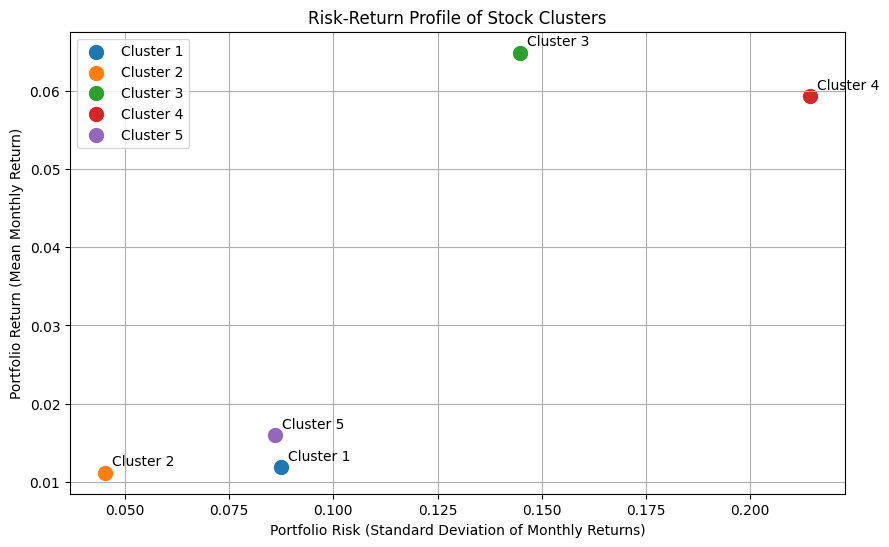


Portfolio Returns for Each Cluster:
Cluster 1: 0.0119
Cluster 2: 0.0112
Cluster 3: 0.0649
Cluster 4: 0.0593
Cluster 5: 0.0159

Portfolio Risks for Each Cluster:
Cluster 1: 0.0875
Cluster 2: 0.0453
Cluster 3: 0.1448
Cluster 4: 0.2143
Cluster 5: 0.0860


In [ ]:

import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the tickers and date range

tickers = ['AAPL', 'MSFT', 'NVDA', 'XOM', 'CVX', 'BP', 'JNJ', 'PFE', 'MRK', 'JPM',
           'GS', 'BAC', 'KO', 'MCD', 'PG', 'AMZN', 'WMT', 'TGT', 'TSLA', 'GM']
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download the data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
close_prices = data.xs('Close', axis=1, level=1)

# 1. Estimate Monthly Stock Returns
monthly_returns = close_prices.resample('M').ffill().pct_change().dropna()
monthly_returns_transposed = monthly_returns.T

# 2. Apply K-Means Clustering (using optimal_k = 5 from previous analysis)
optimal_k = 5
X = monthly_returns_transposed.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_scaled)
stock_clusters = pd.DataFrame({'Ticker': monthly_returns_transposed.index, 'Cluster': clusters})

# 3. Estimate Portfolio Returns and Risks for Each Cluster
cluster_returns = {}
cluster_risks = {}

for i in range(optimal_k):
    cluster_tickers = stock_clusters[stock_clusters['Cluster'] == i]['Ticker'].tolist()
    cluster_return_data = monthly_returns[cluster_tickers]

    # Assuming equal weighting for simplicity
    portfolio_returns = cluster_return_data.mean(axis=1)

    # Mean of portfolio returns
    mean_return = portfolio_returns.mean()
    cluster_returns[f'Cluster {i + 1}'] = mean_return

    # Standard deviation of portfolio returns as a measure of risk
    portfolio_risk = portfolio_returns.std()
    cluster_risks[f'Cluster {i + 1}'] = portfolio_risk

# 4. Plot Portfolio Returns Against Risks
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    cluster_label = f'Cluster {i + 1}'
    return_val = cluster_returns[cluster_label]
    risk_val = cluster_risks[cluster_label]
    plt.scatter(risk_val, return_val, label=cluster_label, s=100)
    plt.annotate(cluster_label, (risk_val, return_val), textcoords="offset points", xytext=(5,5), ha='left')

plt.xlabel('Portfolio Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Portfolio Return (Mean Monthly Return)')
plt.title('Risk-Return Profile of Stock Clusters')
plt.legend()
plt.grid(True)
plt.show()

print("\nPortfolio Returns for Each Cluster:")
for cluster, return_val in cluster_returns.items():
    print(f"{cluster}: {return_val:.4f}")

print("\nPortfolio Risks for Each Cluster:")
for cluster, risk_val in cluster_risks.items():
    print(f"{cluster}: {risk_val:.4f}")

* Cluster 3, located at the far right of the graph, exhibits the highest return (6.49%) but also one of the highest risks (14.48%). This reflects a high-risk, high-return investment profile, attractive to aggressive investors who are willing to tolerate significant volatility for higher gains.
* Cluster 5 also delivers a strong return (1.59%) with moderate risk (8.60%), positioning it as a potentially more efficient portfolio than Cluster 3 — providing a decent return with lower volatility. This suggests that Cluster 5 may be preferable for investors seeking balanced growth.
* In contrast, Cluster 2, in the bottom-left corner of the diagram, represents the lowest-risk portfolio (4.53%) but also the lowest return (1.12%). This configuration is suited for risk-averse investors prioritizing capital preservation over growth.
* Clusters 1 and 4 both have moderate risk levels (~8.7%–21.4%) but their returns are relatively low (1.19% and 5.93%). While Cluster 4 has higher risk than Cluster 1, it does offer a notably better return, showing that not all higher-risk clusters are equally efficient.
* Overall, Cluster 5 stands out as an efficient portfolio: it delivers a competitive return relative to its level of risk, making it potentially superior to the traditional high-return/high-risk combinations seen in Clusters 3 and 4.

### Step 3.3: Optimal portfolio selection and efficient frontier analysis
This step estimates optimal portfolios within each cluster and plots the efficient frontier and
capital market line to interpret risk–return trade-offs.


[*********************100%***********************]  20 of 20 completed
<ipython-input-76-b3208399f0f5>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = close_prices.resample('M').ffill().pct_change().dropna()


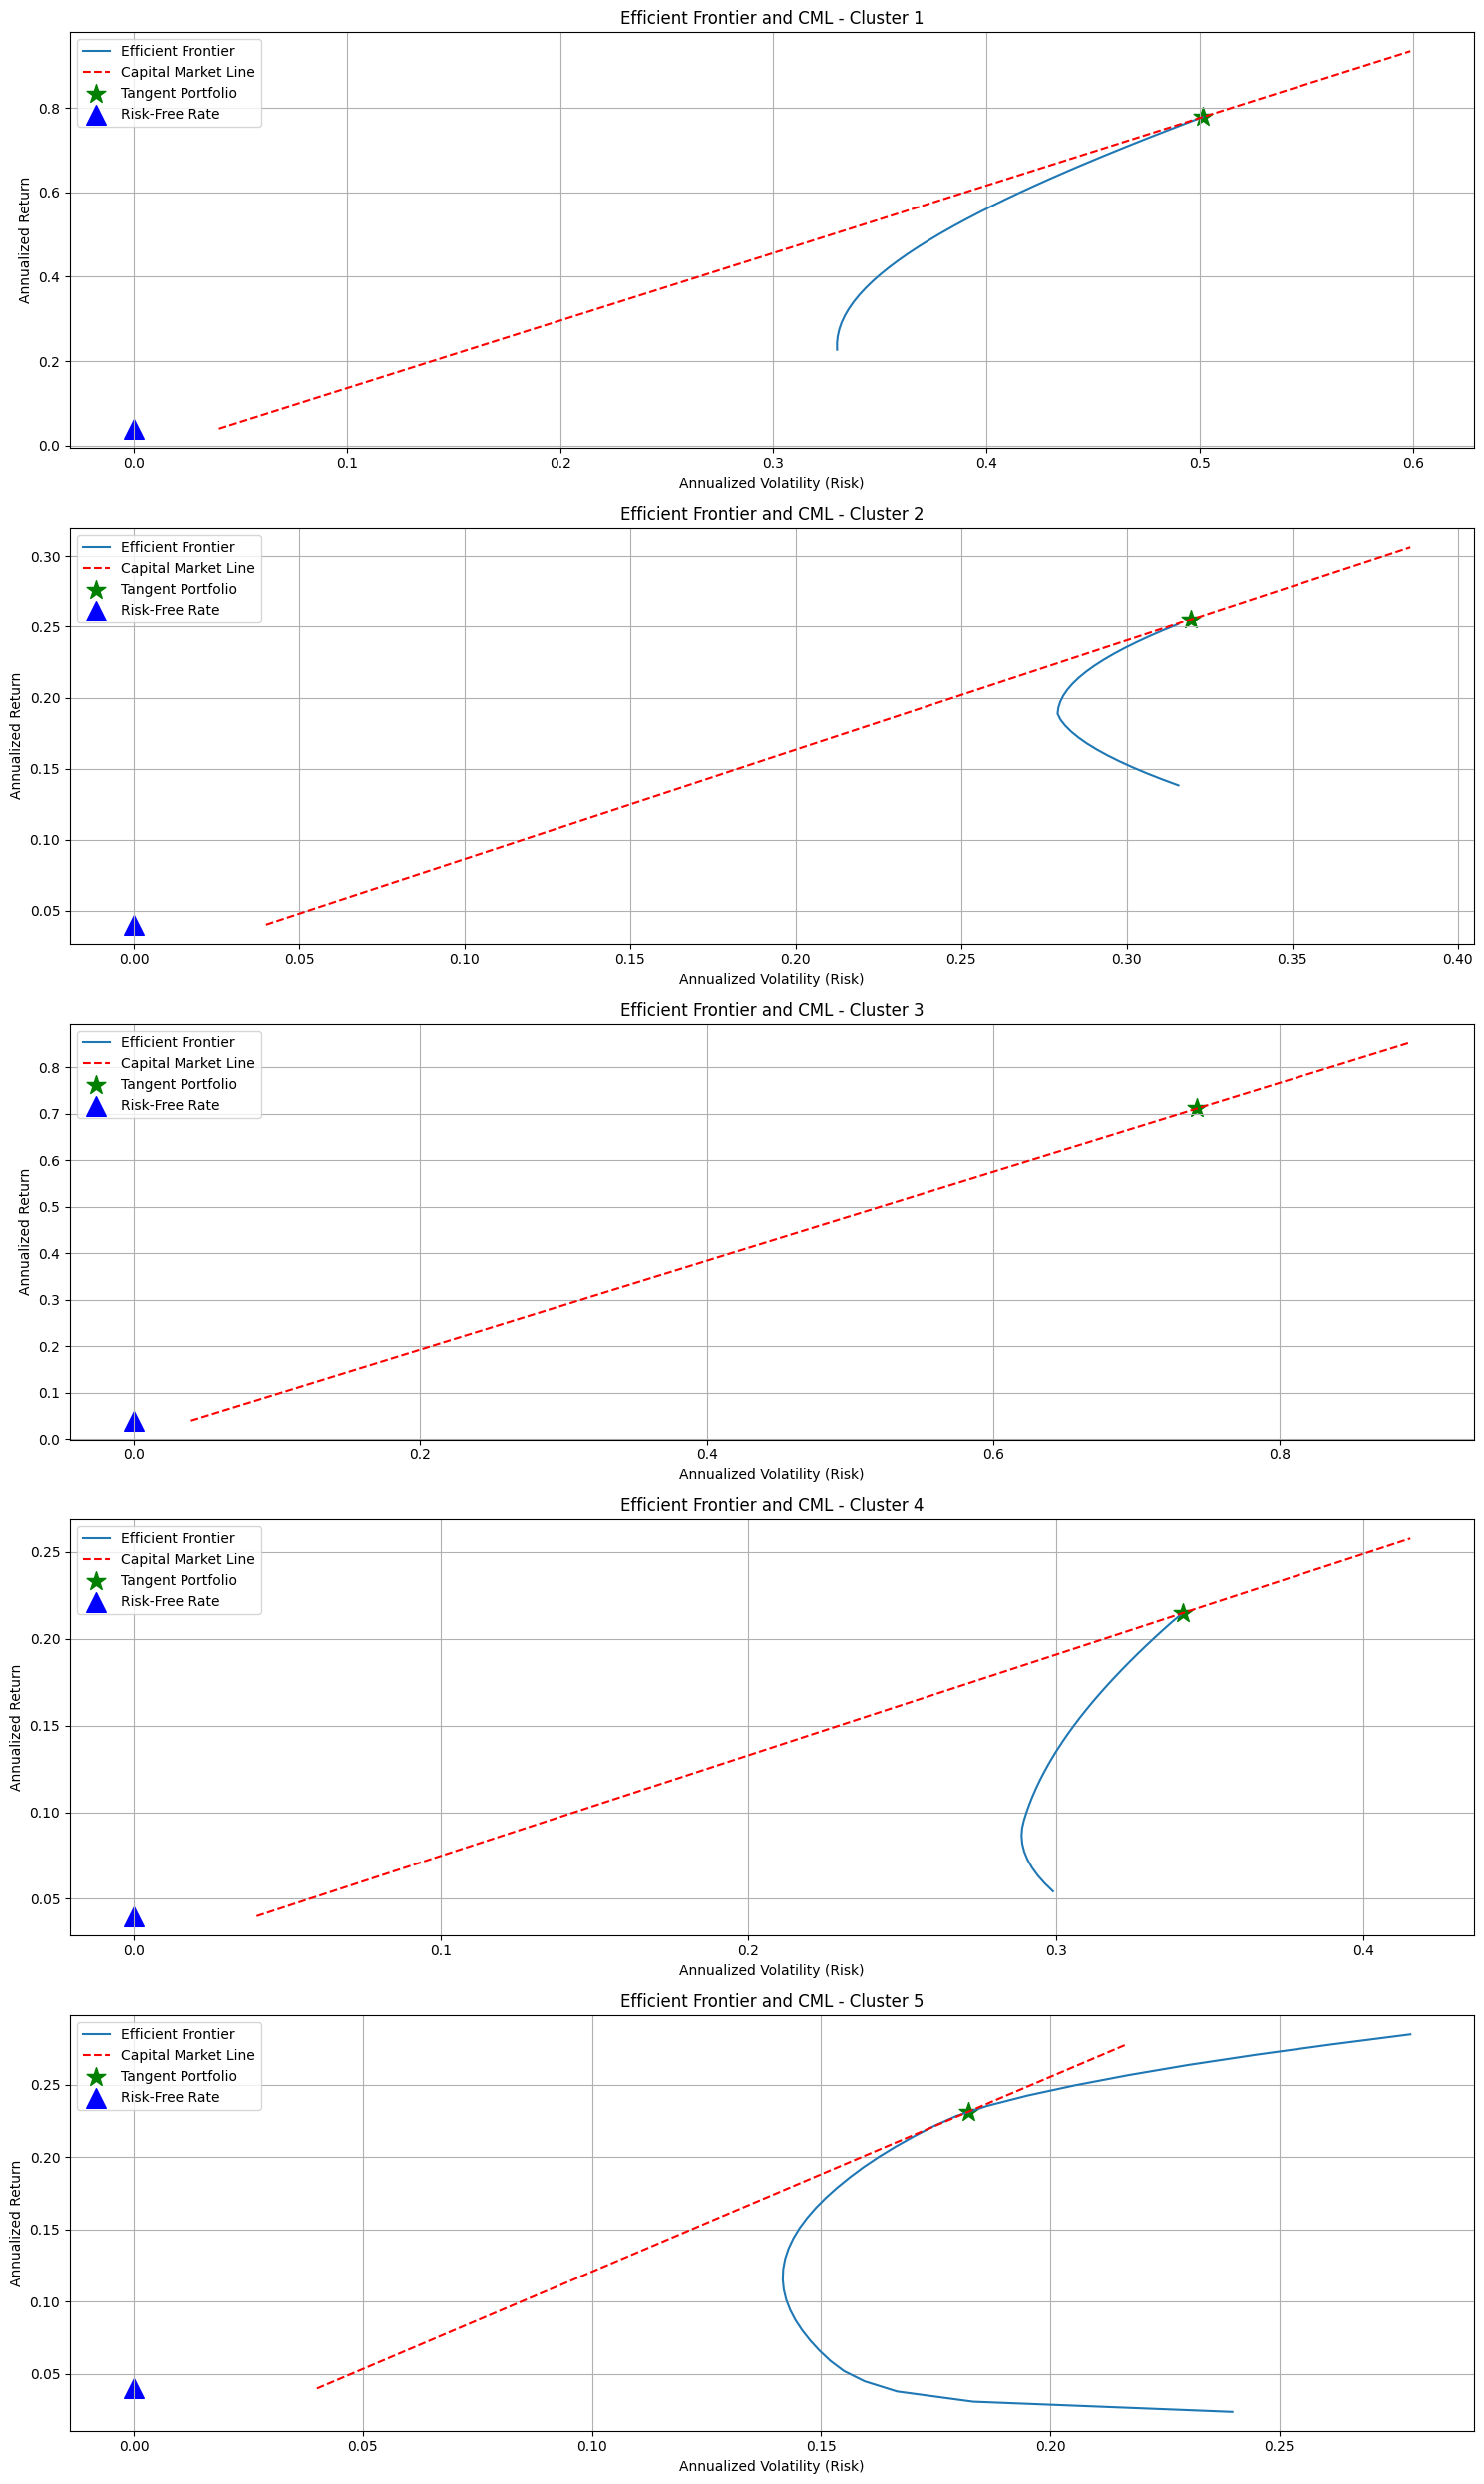

In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the tickers and date range (same as before)
tickers = ['AAPL', 'MSFT', 'NVDA', 'XOM', 'CVX', 'BP', 'JNJ', 'PFE', 'MRK', 'JPM',
           'GS', 'BAC', 'KO', 'MCD', 'PG', 'AMZN', 'WMT', 'TGT', 'TSLA', 'GM']
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download the data and get monthly returns (same as before)
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
close_prices = data.xs('Close', axis=1, level=1)
monthly_returns = close_prices.resample('M').ffill().pct_change().dropna()
monthly_returns_transposed = monthly_returns.T

# 1. Apply K-Means Clustering (same as before, assuming optimal_k = 5)
optimal_k = 5
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = monthly_returns_transposed.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_scaled)
stock_clusters = pd.DataFrame({'Ticker': monthly_returns_transposed.index, 'Cluster': clusters})

# 2. Define Risk-Free Rate (Annualized, will be converted to monthly)
risk_free_rate_annual = 0.04  # Example: 4%
risk_free_rate_monthly = (1 + risk_free_rate_annual)**(1/12) - 1

# 3. Function to calculate portfolio return and volatility
def portfolio_performance(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * 12  # Annualized return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 12, weights))) # Annualized volatility
    return portfolio_return, portfolio_volatility

# 4. Function to minimize portfolio volatility for a target return
def minimize_volatility(weights, returns, target_return):
    ret, vol = portfolio_performance(weights, returns)
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 12, weights))) # Only minimize volatility

# 5. Function to calculate the negative Sharpe Ratio (for maximization)
def negative_sharpe_ratio(weights, returns, risk_free_rate):
    ret, vol = portfolio_performance(weights, returns)
    sharpe_ratio = (ret - risk_free_rate) / vol
    return -sharpe_ratio

# 6. Analyze each cluster
plt.figure(figsize=(15, 5 * optimal_k))
for i in range(optimal_k):
    plt.subplot(optimal_k, 1, i + 1)
    cluster_tickers = stock_clusters[stock_clusters['Cluster'] == i]['Ticker'].tolist()
    cluster_returns_data = monthly_returns[cluster_tickers]

    num_assets = len(cluster_tickers)
    if num_assets > 0:
        # --- Efficient Frontier ---
        target_returns = np.linspace(cluster_returns_data.mean().min() * 10, cluster_returns_data.mean().max() * 15, 50) # Range of target returns
        efficient_frontier_volatility = []
        for tr in target_returns:
            constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                           {'type': 'eq', 'fun': lambda w: portfolio_performance(w, cluster_returns_data)[0] - tr})
            initial_weights = np.array([1/num_assets] * num_assets)
            bounds = tuple((0, 1) for asset in range(num_assets))
            opt_results = minimize(minimize_volatility, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints, args=(cluster_returns_data, tr))
            if opt_results.success:
                efficient_frontier_volatility.append(opt_results.x)
            else:
                efficient_frontier_volatility.append(np.nan) # Handle optimization failures

        efficient_frontier_returns = [portfolio_performance(w, cluster_returns_data)[0] for w in efficient_frontier_volatility if not np.isnan(w).any()]
        efficient_frontier_volatility = [portfolio_performance(w, cluster_returns_data)[1] for w in efficient_frontier_volatility if not np.isnan(w).any()]

        plt.plot(efficient_frontier_volatility, efficient_frontier_returns, label='Efficient Frontier')

        # --- Capital Market Line ---
        constraints_cml = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        initial_weights_cml = np.array([1/num_assets] * num_assets)
        bounds_cml = tuple((0, 1) for asset in range(num_assets))
        optimal_sharpe = minimize(negative_sharpe_ratio, initial_weights_cml, method='SLSQP', bounds=bounds_cml, constraints=constraints_cml, args=(cluster_returns_data, risk_free_rate_annual))

        if optimal_sharpe.success:
            optimal_weights = optimal_sharpe.x
            tangent_portfolio_return, tangent_portfolio_volatility = portfolio_performance(optimal_weights, cluster_returns_data)

            # Plot Capital Market Line
            cml_returns = np.linspace(risk_free_rate_annual, tangent_portfolio_return * 1.2, 50)
            cml_volatility = [risk_free_rate_annual + (tr - risk_free_rate_annual) * (tangent_portfolio_volatility - risk_free_rate_annual) / (tangent_portfolio_return - risk_free_rate_annual) if (tangent_portfolio_return - risk_free_rate_annual) != 0 else [risk_free_rate_annual] * len(cml_returns) for tr in cml_returns] # Handle case where tangent return equals risk-free rate

            plt.plot(cml_volatility, cml_returns, 'r--', label='Capital Market Line')
            plt.scatter(tangent_portfolio_volatility, tangent_portfolio_return, color='green', marker='*', s=200, label='Tangent Portfolio')
        else:
            print(f"Optimization for Tangent Portfolio in Cluster {i+1} failed.")

        plt.scatter(0, risk_free_rate_annual, color='blue', marker='^', s=200, label='Risk-Free Rate')
        plt.xlabel('Annualized Volatility (Risk)')
        plt.ylabel('Annualized Return')
        plt.title(f'Efficient Frontier and CML - Cluster {i + 1}')
        plt.legend()
        plt.grid(True)
    else:
        plt.title(f'No assets in Cluster {i + 1} to perform portfolio optimization.')

plt.tight_layout()
plt.show()

es.
* Cluster 1
Moderate return with moderate risk. The tangency point lies near the upper part of the frontier. Suitable for investors seeking balanced growth.
* Cluster 2
Lowest volatility and limited return. The efficient frontier is narrow. Best suited for risk-averse investors.
* Cluster 3
Highest return and highest risk. Wide frontier with steep CML, indicating a high-growth, high-volatility profile.
* Cluster 4
Good balance between risk and return. The tangency portfolio offers stable performance with moderate volatility.
* Cluster 5
Most efficient overall. The CML aligns well with the frontier, and the tangency point offers strong return at reasonable risk — ideal for mainstream investors.

## 4) Time-series forecasting and econometric analysis

This section applies time-series econometric techniques to analyse dynamic relationships between
stock indices and exchange rates.


### Step 4.1: Financial time-series construction and return generation
This step loads monthly S&P 500, FTSE 100, and exchange rate data, computes stock returns and
percentage exchange rate changes, and prepares the time-series dataset.


In [ ]:

import yfinance as yf
import pandas as pd

# 1. Load Monthly Stock Price Indices
start_date = "2020-01-01"
end_date = "2024-12-31"
sp500_data = yf.download("^GSPC", start=start_date, end=end_date, interval="1mo")
ftse100_data = yf.download("^FTSE", start=start_date, end=end_date, interval="1mo")

sp500 = sp500_data.loc[:, ('Close', '^GSPC')]
ftse100 = ftse100_data.loc[:, ('Close', '^FTSE')]

# Convert to DataFrame and rename columns
stock_indices = pd.DataFrame({'S&P500': sp500, 'FTSE100': ftse100})

print("\nStock Indices Data:")
print(stock_indices.head())

# 2. Load Monthly Exchange Rate (GBP to USD - You might need to adjust the symbols)
# Using FRED (Federal Reserve Economic Data) via yfinance
gbp_usd_data = yf.download("GBPUSD=X", start=start_date, end=end_date, interval="1mo")

print("\nGBP/USD Data Columns:")
print(gbp_usd_data.columns)

gbp_usd_rate = gbp_usd_data.loc[:, ('Close', 'GBPUSD=X')]

# Convert to DataFrame and rename column
exchange_rate = pd.DataFrame({'GBP/USD': gbp_usd_rate})

print("\nGBP/USD Exchange Rate Data:")
print(exchange_rate.head())

# 3. Merge the DataFrames
merged_data = pd.concat([stock_indices, exchange_rate], axis=1).dropna()

print("\nMerged Data:")
print(merged_data.head())

# 4. Estimate Stock Returns
stock_returns_df = merged_data[['S&P500', 'FTSE100']].pct_change().dropna()
stock_returns_df.rename(columns={'S&P500': 'S&P500 Returns', 'FTSE100': 'FTSE100 Returns'}, inplace=True)

print("\nStock Returns:")
print(stock_returns_df.head())

# 5. Generate Percentage Change in Exchange Rate
exchange_rate_change = merged_data['GBP/USD'].pct_change().dropna()
exchange_rate_change = pd.DataFrame({'GBP/USD Change': exchange_rate_change})

print("\nGBP/USD Exchange Rate Change:")
print(exchange_rate_change.head())

# 6. Final DataFrame with the Three Variables
final_data = pd.concat([stock_returns_df, exchange_rate_change], axis=1).dropna()

print("\nFinal Data for Analysis:")
print(final_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Stock Indices Data:
                 S&P500      FTSE100
Date                                
2020-01-01  3225.520020  7286.000000
2020-02-01  2954.219971  6580.600098
2020-03-01  2584.590088  5672.000000
2020-04-01  2912.429932  5901.200195
2020-05-01  3044.310059  6076.600098


[*********************100%***********************]  1 of 1 completed


GBP/USD Data Columns:
MultiIndex([( 'Close', 'GBPUSD=X'),
            (  'High', 'GBPUSD=X'),
            (   'Low', 'GBPUSD=X'),
            (  'Open', 'GBPUSD=X'),
            ('Volume', 'GBPUSD=X')],
           names=['Price', 'Ticker'])

GBP/USD Exchange Rate Data:
             GBP/USD
Date                
2020-01-01  1.308900
2020-02-01  1.281839
2020-03-01  1.237164
2020-04-01  1.247147
2020-05-01  1.234499

Merged Data:
                 S&P500      FTSE100   GBP/USD
Date                                          
2020-01-01  3225.520020  7286.000000  1.308900
2020-02-01  2954.219971  6580.600098  1.281839
2020-03-01  2584.590088  5672.000000  1.237164
2020-04-01  2912.429932  5901.200195  1.247147
2020-05-01  3044.310059  6076.600098  1.234499

Stock Returns:
            S&P500 Returns  FTSE100 Returns
Date                                       
2020-02-01       -0.084110        -0.096816
2020-03-01       -0.125119        -0.138073
2020-04-01        0.126844         0.040409
202

### Step 4.2: Stationarity testing using unit root tests
This step applies unit root tests to assess whether the generated time-series variables are
stationary or non-stationary.


In [ ]:

from statsmodels.tsa.stattools import adfuller
import pandas as pd

def perform_adf_test(series, series_name):
    """Performs the Augmented Dickey-Fuller test on a time series."""
    print(f'ADF Test for: {series_name}')
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')

    if result[1] <= 0.05:
        print(f'{series_name} is likely stationary.')
    else:
        print(f'{series_name} is likely non-stationary.')
    print('-' * 50)

# Perform ADF test on each of the three variables
perform_adf_test(final_data['S&P500 Returns'], 'S&P500 Returns')
perform_adf_test(final_data['FTSE100 Returns'], 'FTSE100 Returns')
perform_adf_test(final_data['GBP/USD Change'], 'GBP/USD Change')

ADF Test for: S&P500 Returns
ADF Statistic: -8.9146
p-value: 0.0000
Critical Values:
   1%: -3.5485
   5%: -2.9128
   10%: -2.5941
S&P500 Returns is likely stationary.
--------------------------------------------------
ADF Test for: FTSE100 Returns
ADF Statistic: -8.1612
p-value: 0.0000
Critical Values:
   1%: -3.5485
   5%: -2.9128
   10%: -2.5941
FTSE100 Returns is likely stationary.
--------------------------------------------------
ADF Test for: GBP/USD Change
ADF Statistic: -7.0749
p-value: 0.0000
Critical Values:
   1%: -3.5485
   5%: -2.9128
   10%: -2.5941
GBP/USD Change is likely stationary.
--------------------------------------------------


* S&P 500 Returns:
Since the ADF statistic is significantly less than all critical values and the p-value is well below 0.05, we reject the null hypothesis. This indicates that the S&P 500 returns series is stationary.
* FTSE 100 Returns:
Again, the test statistic is far below the critical thresholds, and the p-value confirms statistical significance. Hence, we conclude that the FTSE 100 returns series is also stationary.
* GBP/USD Exchange Rate Change:
The exchange rate change series also yields a strongly negative ADF statistic and a p-value of 0.0000. This implies that the exchange rate percentage change is stationary.

### Step 4.3: Cointegration analysis and long-run relationship testing
This step applies Johansen cointegration tests and the Engle–Granger two-step procedure to evaluate
long-run relationships among the variables.


In [ ]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint

# Johansen Test
johansen_test = coint_johansen(final_data, det_order=0, k_ar_diff=1)
print('Trace Statistics:', johansen_test.lr1)
print('Critical Values (90%):', johansen_test.cvt[:, 0])

# Engle-Granger Pairwise Tests
combinations = [('S&P500 Returns', 'FTSE100 Returns'),
                ('S&P500 Returns', 'GBP/USD Change'),
                ('FTSE100 Returns', 'GBP/USD Change')]

for pair in combinations:
    _, pvalue, _ = coint(final_data[pair[0]], final_data[pair[1]])
    print(f"{pair[0]} vs {pair[1]} - p-value: {pvalue:.4f}")

Trace Statistics: [123.84244057  57.86044123  23.50200081]
Critical Values (90%): [27.0669 13.4294  2.7055]
S&P500 Returns vs FTSE100 Returns - p-value: 0.0000
S&P500 Returns vs GBP/USD Change - p-value: 0.0000
FTSE100 Returns vs GBP/USD Change - p-value: 0.0000


The Johansen test results show that all trace statistics significantly exceed their critical values, indicating strong evidence of cointegration among the three variables. Additionally, the Engle-Granger two-step method confirms cointegration between each pair, as all ADF test p-values are 0.0000. This suggests a stable long-term equilibrium relationship exists between S&P500 returns, FTSE100 returns, and GBP/USD exchange rate changes.

### Step 4.4: VAR model estimation and out-of-sample forecasting
This step estimates a VAR model using first-differenced variables, performs train–test forecasting,
and compares predicted and actual series.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Optimal Lag Order (based on different criteria):
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -18.92      -18.78   6.096e-09      -18.87
1      -19.77      -19.23   2.614e-09      -19.58
2      -20.22     -19.29*   1.673e-09      -19.90
3      -20.27      -18.93   1.656e-09      -19.81
4     -20.80*      -19.06  1.039e-09*     -20.20*
5      -20.49      -18.36   1.573e-09      -19.75
-------------------------------------------------

VAR Model Summary (Order 4):
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, May, 2025
Time:                     07:26:34
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.9576
Nobs:                     36.0000    HQIC:                  -20.0743
Log likelihood:           257.869    F

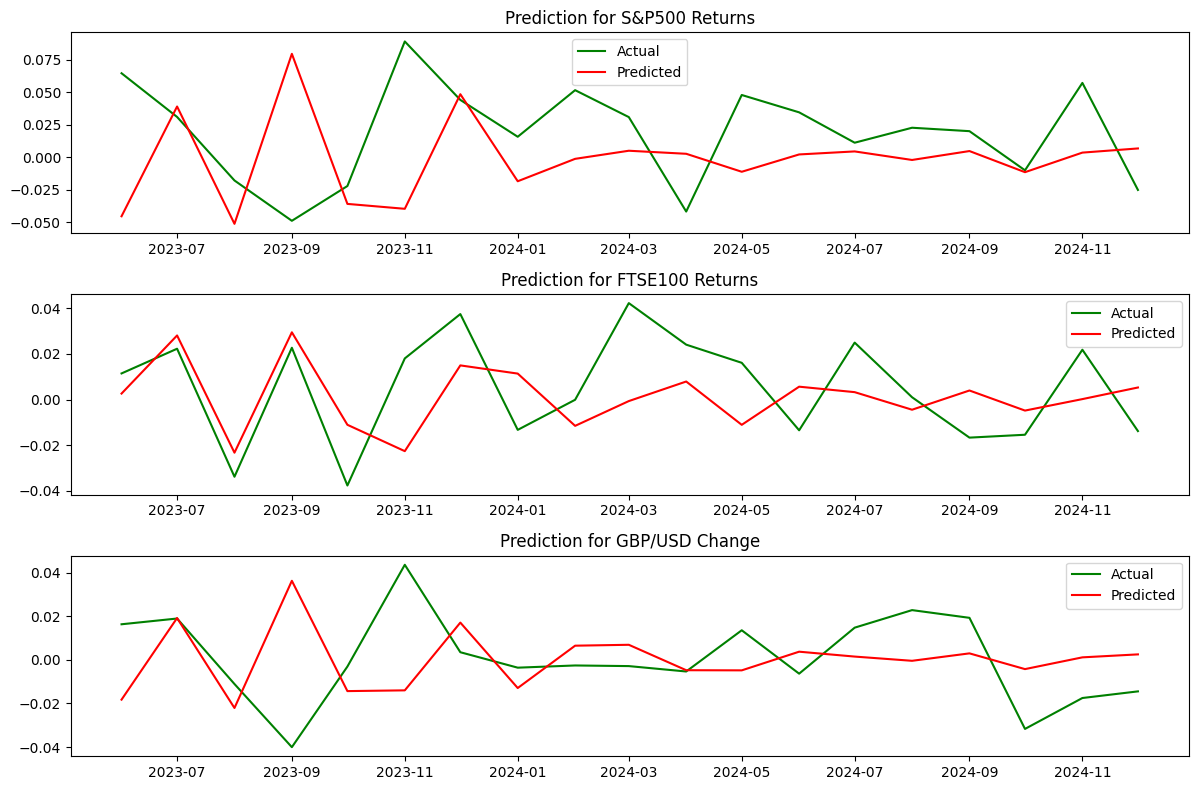


Prediction Evaluation Metrics (RMSE):
S&P500 Returns: 0.0573
FTSE100 Returns: 0.0217
GBP/USD Change: 0.0270

Prediction Evaluation Metrics (MSE):
S&P500 Returns: 0.0033
FTSE100 Returns: 0.0005
GBP/USD Change: 0.0007

Prediction Evaluation Metrics (MAE):
S&P500 Returns: 0.0426
FTSE100 Returns: 0.0191
GBP/USD Change: 0.0199


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, mse, meanabs

# 1. Take First Differences
final_data_diff = final_data.diff().dropna()

train_size = int(len(final_data_diff) * 0.7)
train_data = final_data_diff[:train_size]
test_data = final_data_diff[train_size:]

# 3. Determine Optimal Lag Order
model = VAR(train_data)
lag_results = model.select_order(maxlags=5) # You can adjust maxlags
print('\nOptimal Lag Order (based on different criteria):')
print(lag_results.summary())
optimal_lag = lag_results.aic # Using AIC as the criterion

# 4. Fit the VAR Model
model_fitted = model.fit(optimal_lag)
print(f'\nVAR Model Summary (Order {optimal_lag}):')
print(model_fitted.summary())

train_size1 = int(len(final_data) * 0.7)
train_data1 = final_data[:train_size]
test_data1 = final_data[train_size:]

# 5. Make Predictions
lag_values = train_data1.values[-optimal_lag:]
predictions = model_fitted.forecast(lag_values, steps=len(test_data1))
predictions_df = pd.DataFrame(predictions, index=test_data1.index, columns=test_data1.columns)

# 6. Plot Predictions vs. Actuals
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
for i, column in enumerate(test_data1.columns):
    axes[i].plot(test_data1[column], label='Actual', color='Green')
    axes[i].plot(predictions_df[column], label='Predicted', color='red')
    axes[i].set_title(f'Prediction for {column}')
    axes[i].legend()
plt.tight_layout()
plt.show()

# 7. Interpret the Prediction (Evaluation Metrics)
print('\nPrediction Evaluation Metrics (RMSE):')
for column in test_data1.columns:
    rmse_val = rmse(test_data1[column], predictions_df[column])
    print(f'{column}: {rmse_val:.4f}')

print('\nPrediction Evaluation Metrics (MSE):')
for column in test_data1.columns:
    mse_val = mse(test_data1[column], predictions_df[column])
    print(f'{column}: {mse_val:.4f}')

print('\nPrediction Evaluation Metrics (MAE):')
for column in test_data1.columns:
    mae_val = meanabs(test_data1[column], predictions_df[column])
    print(f'{column}: {mae_val:.4f}')

* The VAR model predictions showed visible deviation from actual values, particularly for the S&P500 returns, where predicted lines were relatively flatter and failed to capture sharp fluctuations in the actual data. This suggests the model struggled with the volatility and non-linear jumps in US stock returns.
* For FTSE100 returns, the predicted values followed the general direction of the actual series but tended to underestimate the magnitude of peaks and troughs. The alignment was better than S&P500 but still showed lags during sudden movements.
* In the case of GBP/USD exchange rate changes, predictions were smoother and less reactive than actual values, often missing short-term spikes and dips. However, the overall level and trend were more closely tracked compared to stock return series.

## 5) Volatility modelling and risk comparison (ARCH/GARCH)

This section models time-varying volatility in financial and cryptocurrency markets to assess
relative investment risk.


### Step 5.1: Cryptocurrency return construction and data integration
This step loads cryptocurrency price data from Yahoo Finance, merges it with stock market data,
and computes return series.


In [ ]:

import yfinance as yf
import pandas as pd

# Load cryptocurrency data (e.g., Bitcoin)
ticker = 'BTC-USD'
crypto = yf.download(ticker, start='2020-01-01', end='2025-01-01', interval='1mo')['Close']
crypto.head(5).round(2)

# Final DataFrame
merged_df = pd.concat([merged_data, crypto], axis=1).dropna()
merged_df.head(5).round(2)

[*********************100%***********************]  1 of 1 completed


,S&P500,FTSE100,GBP/USD,BTC-USD
Date,,,,
2020-01-01,3225.52,7286.0,1.31,9350.53
2020-02-01,2954.22,6580.6,1.28,8599.51
2020-03-01,2584.59,5672.0,1.24,6438.64
2020-04-01,2912.43,5901.2,1.25,8658.55
2020-05-01,3044.31,6076.6,1.23,9461.06


In [ ]:
# Calculate returns
merged_df['BTC-USD_ret'] = merged_df['BTC-USD'].pct_change().dropna()

# Final DataFrame
final_df = pd.concat([final_data, merged_df['BTC-USD_ret']], axis=1).dropna()
final_df.reset_index(inplace=True)
final_df.head(5).round(2)

,Date,S&P500 Returns,FTSE100 Returns,GBP/USD Change,BTC-USD_ret
0,2020-02-01,-0.08,-0.10,-0.02,-0.08
1,2020-03-01,-0.13,-0.14,-0.03,-0.25
2,2020-04-01,0.13,0.04,0.01,0.34
3,2020-05-01,0.05,0.03,-0.01,0.09
4,2020-06-01,0.02,0.02,-0.00,-0.03


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.8 MB/s eta 0:00:00


### Step 5.2: ARCH modelling and volatility diagnostics
This step estimates ARCH models for price and return series, selects appropriate lag structures,
and evaluates model suitability.


BTC Price - ARCH Model Summary:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                BTC-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -670.457
Distribution:                  Normal   AIC:                           1354.91
Method:            Maximum Likelihood   BIC:                           1369.57
                                        No. Observations:                   60
Date:                Fri, May 09 2025   Df Residuals:                       59
Time:                        07:47:51   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.6955e+04   8

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.493e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


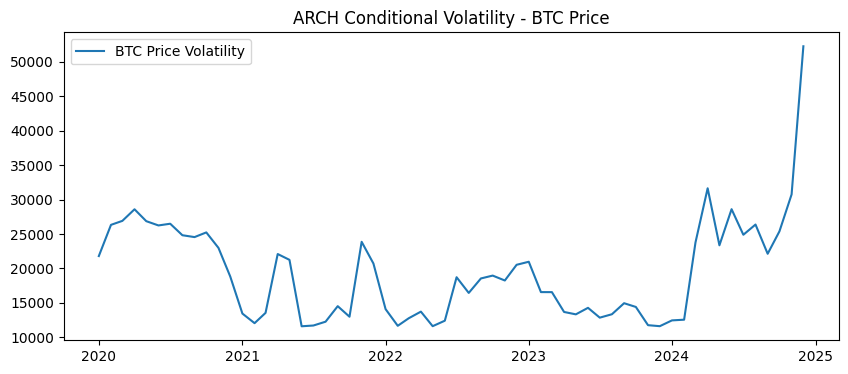

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.028e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


S&P500 Price - ARCH Model Summary:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                 S&P500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -458.738
Distribution:                  Normal   AIC:                           931.477
Method:            Maximum Likelihood   BIC:                           946.137
                                        No. Observations:                   60
Date:                Fri, May 09 2025   Df Residuals:                       59
Time:                        07:47:51   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          4248.5605 

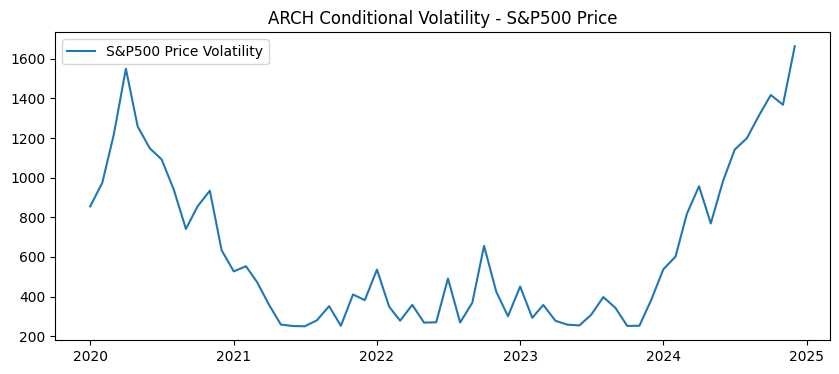

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.215e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


FTSE100 Price - ARCH Model Summary:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                FTSE100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -456.179
Distribution:                  Normal   AIC:                           926.358
Method:            Maximum Likelihood   BIC:                           941.019
                                        No. Observations:                   60
Date:                Fri, May 09 2025   Df Residuals:                       59
Time:                        07:47:51   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          7464.5762

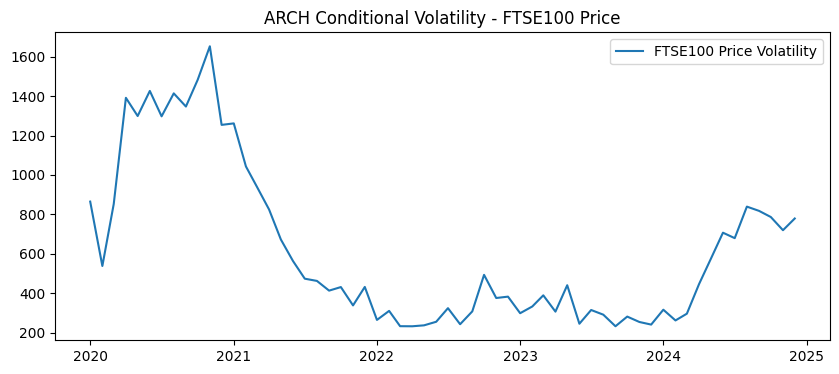

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03872. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


BTC Returns - ARCH Model Summary:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:            BTC-USD_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12.7204
Distribution:                  Normal   AIC:                          -11.4408
Method:            Maximum Likelihood   BIC:                           3.10200
                                        No. Observations:                   59
Date:                Fri, May 09 2025   Df Residuals:                       58
Time:                        07:47:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0634  2.413e

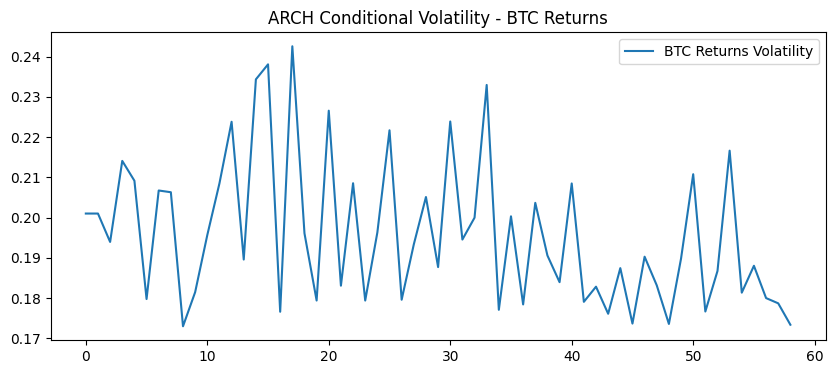

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


FTSE500 Returns - ARCH Model Summary:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:        FTSE100 Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                115.851
Distribution:                  Normal   AIC:                          -217.702
Method:            Maximum Likelihood   BIC:                          -203.159
                                        No. Observations:                   59
Date:                Fri, May 09 2025   Df Residuals:                       58
Time:                        07:47:51   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.229

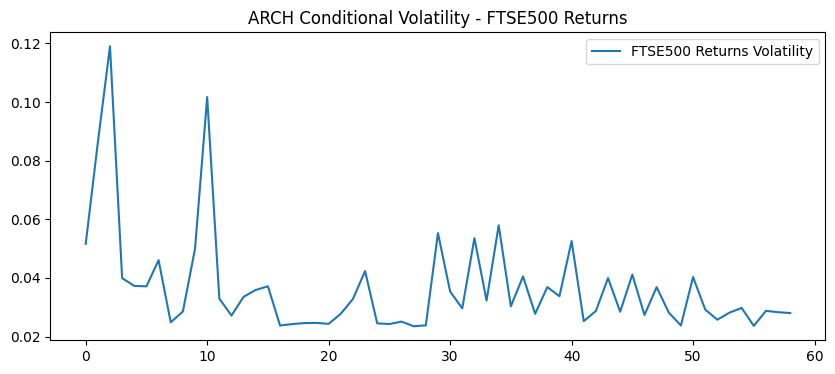

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002753. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


S&P500 Returns - ARCH Model Summary:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:         S&P500 Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                94.8073
Distribution:                  Normal   AIC:                          -175.615
Method:            Maximum Likelihood   BIC:                          -161.072
                                        No. Observations:                   59
Date:                Fri, May 09 2025   Df Residuals:                       58
Time:                        07:47:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.015

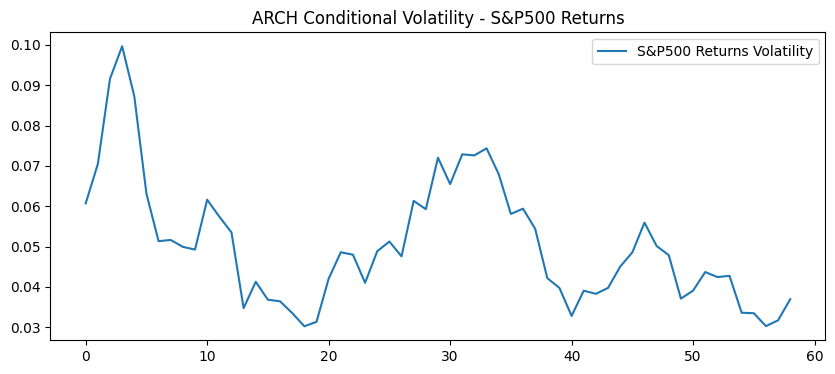

In [ ]:

from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

def run_arch_tests(merged_df, title=''):
    # ARCH model (order 1)
    am = arch_model(merged_df, vol='ARCH', p=5)
    res = am.fit(disp='off')

    print(f"{title} - ARCH Model Summary:\n", res.summary())

    # Ljung-Box test for squared residuals (ARCH effects)
    lb_test = acorr_ljungbox(res.resid ** 2, lags=[10], return_df=True)
    print(f"{title} - Ljung-Box test:\n", lb_test)

    # Plot conditional volatility
    plt.figure(figsize=(10, 4))
    plt.plot(res.conditional_volatility, label=f"{title} Volatility")
    plt.title(f"ARCH Conditional Volatility - {title}")
    plt.legend()
    plt.show()
run_arch_tests(merged_df['BTC-USD'], 'BTC Price')
run_arch_tests(merged_df['S&P500'], 'S&P500 Price')
run_arch_tests(merged_df['FTSE100'], 'FTSE100 Price')
run_arch_tests(final_df['BTC-USD_ret'], 'BTC Returns')
run_arch_tests(final_df['FTSE100 Returns'], 'FTSE500 Returns')
run_arch_tests(final_df['S&P500 Returns'], 'S&P500 Returns')

### Step 5.3: GARCH modelling and comparative risk analysis
This step estimates GARCH models, analyses conditional volatility, and compares the risk profiles
of cryptocurrency and stock market investments.


Running GARCH(5,1) model on original cryptocurrency and stock indices...


BTC Price - GARCH Model Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                BTC-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -669.863
Distribution:                  Normal   AIC:                           1355.73
Method:            Maximum Likelihood   BIC:                           1372.48
                                        No. Observations:                   60
Date:                Fri, May 09 2025   Df Residuals:                       59
Time:                        07:52:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
--------------------------

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.493e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


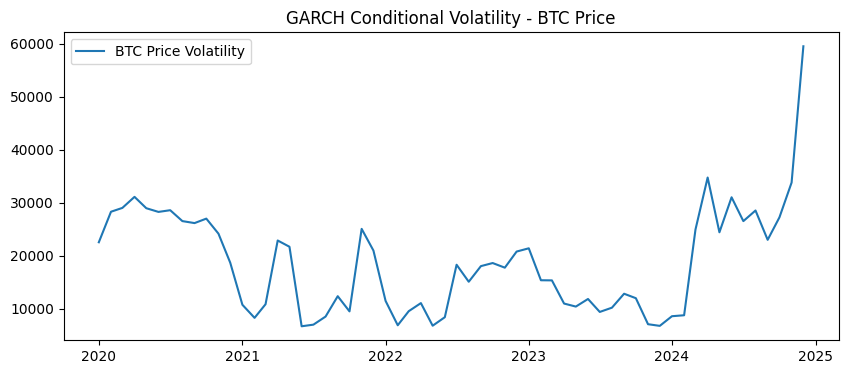


S&P500 Price - GARCH Model Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                 S&P500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -458.738
Distribution:                  Normal   AIC:                           933.477
Method:            Maximum Likelihood   BIC:                           950.232
                                        No. Observations:                   60
Date:                Fri, May 09 2025   Df Residuals:                       59
Time:                        07:52:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          4248.536

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.028e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


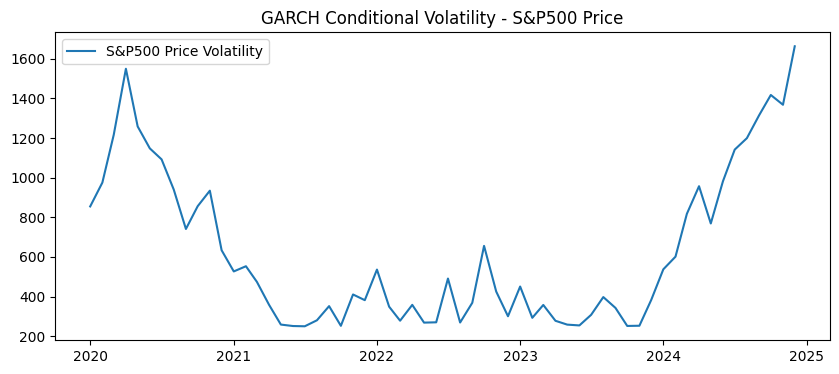

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.215e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



FTSE100 Price - GARCH Model Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                FTSE100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -456.179
Distribution:                  Normal   AIC:                           928.358
Method:            Maximum Likelihood   BIC:                           945.113
                                        No. Observations:                   60
Date:                Fri, May 09 2025   Df Residuals:                       59
Time:                        07:52:46   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          7464.52

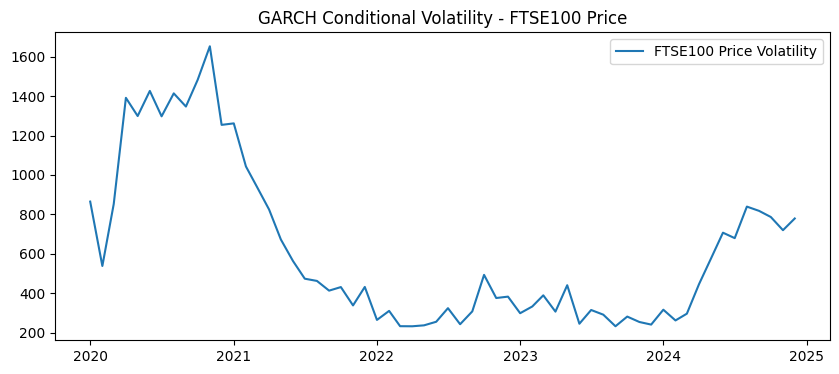

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03872. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



Running GARCH(5,1) model on returns to evaluate risk dynamics...


BTC Returns - GARCH Model Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:            BTC-USD_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                13.2041
Distribution:                  Normal   AIC:                          -10.4083
Method:            Maximum Likelihood   BIC:                           6.21204
                                        No. Observations:                   59
Date:                Fri, May 09 2025   Df Residuals:                       58
Time:                        07:52:46   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------

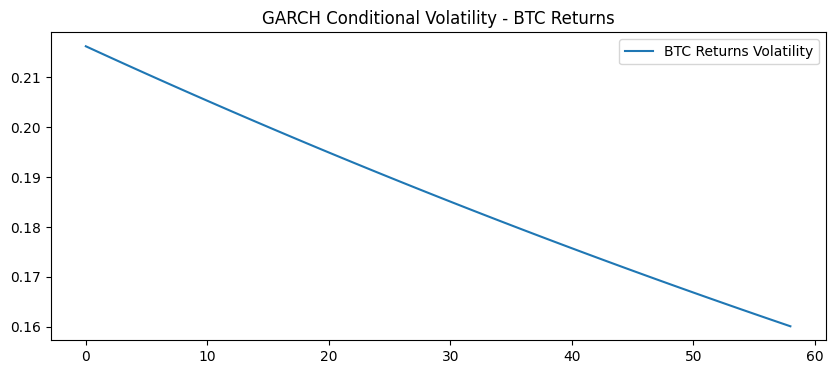


FTSE100 Returns - GARCH Model Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:        FTSE100 Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                115.851
Distribution:                  Normal   AIC:                          -215.702
Method:            Maximum Likelihood   BIC:                          -199.081
                                        No. Observations:                   59
Date:                Fri, May 09 2025   Df Residuals:                       58
Time:                        07:52:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.2

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


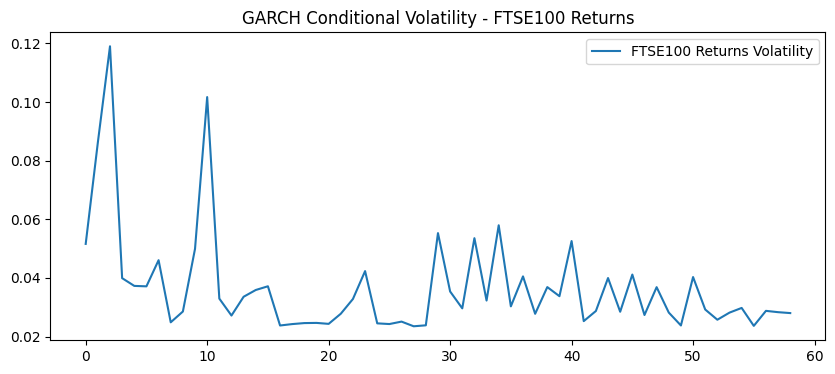

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002753. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



S&P500 Returns - GARCH Model Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:         S&P500 Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                94.8073
Distribution:                  Normal   AIC:                          -173.615
Method:            Maximum Likelihood   BIC:                          -156.994
                                        No. Observations:                   59
Date:                Fri, May 09 2025   Df Residuals:                       58
Time:                        07:52:46   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0

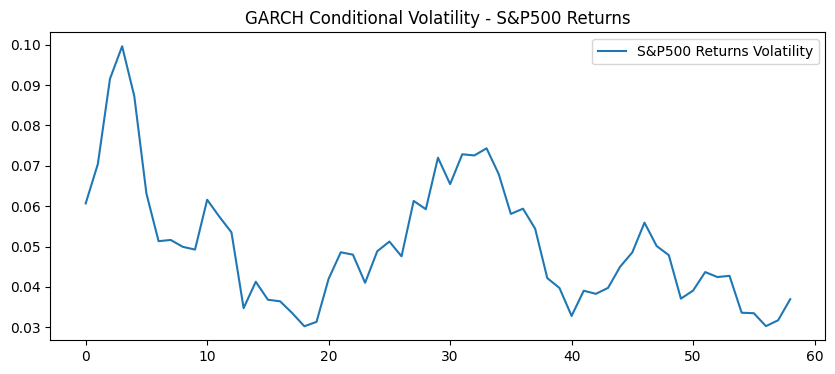

In [ ]:
# Import necessary library for GARCH modeling
from arch import arch_model
import matplotlib.pyplot as plt

# Define a function to run GARCH(5,1) model on a given series
def run_garch(series, title=''):
    # Fit GARCH model with lag orders p=5, q=1
    model = arch_model(series, vol='GARCH', p=5, q=1)
    res = model.fit(disp='off')  # Suppress output during fitting

    # Print model summary for interpretation
    print(f"\n{title} - GARCH Model Summary:\n", res.summary())

    # Plot conditional volatility estimated from GARCH
    plt.figure(figsize=(10, 4))
    plt.plot(res.conditional_volatility, label=f"{title} Volatility")
    plt.title(f"GARCH Conditional Volatility - {title}")
    plt.legend()
    plt.show()

    # Return volatility series for further analysis if needed
    return res.conditional_volatility

# Run GARCH model on original price series
print("Running GARCH(5,1) model on original cryptocurrency and stock indices...\n")
run_garch(merged_df['BTC-USD'], 'BTC Price')
run_garch(merged_df['S&P500'], 'S&P500 Price')
run_garch(merged_df['FTSE100'], 'FTSE100 Price')

# Run GARCH model on returns series to assess return volatility
print("\nRunning GARCH(5,1) model on returns to evaluate risk dynamics...\n")
btc_vol = run_garch(final_df['BTC-USD_ret'], 'BTC Returns')
ftse_vol = run_garch(final_df['FTSE100 Returns'], 'FTSE100 Returns')
sp_vol = run_garch(final_df['S&P500 Returns'], 'S&P500 Returns')

In [ ]:
# Calculate and print the average conditional volatility from the GARCH model for each asset
# This helps us compare the average risk levels of cryptocurrency vs. stock indices
print(f"Avg BTC volatility: {btc_vol.mean():.4f}")
print(f"Avg S&P 500 volatility: {sp_vol.mean():.4f}")
print(f"Avg FTSE 100 volatility: {ftse_vol.mean():.4f}")

Avg BTC volatility: 0.1868
Avg S&P 500 volatility: 0.0506
Avg FTSE 100 volatility: 0.0366


We applied GARCH(5,1) models on both original price series and returns series of Bitcoin, S&P 500, and FTSE 100.
For each series, the optimal lags were chosen based on volatility clustering and ARCH effects observed in prior steps.

In the price series:
- Volatility clustering was visible in all three assets.
- However, GARCH on price series is less reliable due to non-stationarity, so we focus more on returns.

In the returns series:
- Avg BTC volatility: 0.1868 — Highest among the assets.
- Avg S&P 500 volatility: 0.0506 — Moderate and relatively stable.
- Avg FTSE 100 volatility: 0.0366 — Lowest, indicating minimal risk.

Conclusion:
Bitcoin demonstrates significantly higher average conditional volatility compared to S&P 500 and FTSE 100.
This confirms that digital currency (BTC) is a riskier investment option than traditional stock market indices.